In [1]:
import os as os
os.chdir(r'C:\Users\falco\Desktop\directory\Cattle_AMR_2')
data_path = r'C:/Users/falco/Desktop/directory/Cattle_AMR_2/data/'
output_path = r'C:/Users/falco/Desktop/directory/Cattle_AMR_2/outputs/'

#os.chdir(r'/home/falco/Desktop/directory/Cattle_AMR_2/')
#data_path = r'/home/falco/Desktop/directory/Cattle_AMR_2/data/'
#output_path = r'/home/falco/Desktop/directory/Cattle_AMR_2/outputs/'

import sklearn
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
#from pandas_ml import ConfusionMatrix
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


import pandas.api.types as pdtypes

from plotnine import *
from plydata import *

np.random.seed(1234)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from functions import functions as f

import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']+1
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['figure.figsize'] = 8, 8
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
data, d = f.read_process_data(data_path=data_path)

reading datafile
fill missing values and correct some values
changing the column names
generating output variables
final R_factor output
1    213
0     30
Name: Penicillin, dtype: int64
0    204
1     39
Name: Tetracycline, dtype: int64
1    213
0     30
Name: Ceftiofur, dtype: int64
Wall time: 465 ms


In [3]:
sal_d = data[data['F_Salmonella PCR_Result'] == 'Positive']

In [4]:
sal_d.columns.tolist()

['Dairy ID',
 'MT_Results Individual_CowID',
 'Date',
 'Accession',
 'Org1',
 'Org2',
 'F_Salmonella PCR_Result',
 'SampleID2',
 'CollectionDate',
 'F_AMR_CowID',
 'Serotype',
 'SR_FOX',
 'SR_AZI',
 'SR_CHL',
 'SR_TET',
 'SR_AXO',
 'SR_AUG2',
 'SR_CIP',
 'SR_GEN',
 'SR_Nal',
 'SR_XNL',
 'SR_FIS',
 'SR_SXT',
 'SR_AMP',
 'SR_STR',
 'MT_Results Individual F_AMR_Number of drugs Resistant',
 'SalmNoDrugsIntermedResist',
 'MT_Results Individual F_AMR_Number of drugs Susceptable',
 'Multidrug Resistant',
 'Resistant to ?1 drug',
 'Date AMR tested',
 'EcoliResist_FOX',
 'EcoliResist_AZI',
 'EcoliResist_CHL',
 'EcoliResist_TET',
 'EcoliResist_AXO',
 'EcoliResist_AUG2',
 'EcoliResist_CIP',
 'EcoliResist_GEN',
 'EcoliResist_Nal',
 'EcoliResist_XNL',
 'EcoliResist_FIS',
 'EcoliResist_SXT',
 'EcoliResist_AMP',
 'EcoliResist_STR',
 'EcoliResist_KAN',
 'Ecoli resistance_Number of drugs Resistant',
 'EcoliNoDrugsIntermedResist',
 'Ecoli resistance_Number of drugs Susceptable',
 'Ecoli resistance_Multi

In [5]:
sal_d.SR_SXT.value_counts()

S    54
R     4
Name: SR_SXT, dtype: int64

In [6]:
sal_d.Sal_AbR.values

array([list([]), list(['Penicillins', 'Tetracyclines', 'Amphenicols']),
       list([]), list(['Penicillins', 'Tetracyclines', 'Amphenicols']),
       list(['Tetracyclines']), list(['Penicillins']),
       list(['Tetracyclines']), list([]), list([]), list([]), list([]),
       list(['Amphenicols']), list([]), list([]),
       list(['Folate pathway antagonist']), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list(['Tetracyclines']),
       list(['Tetracyclines']), list([]), list(['Tetracyclines']),
       list(['Folate pathway antagonist']), list(['Tetracyclines']),
       list(['Penicillins', 'Tetracyclines']), list([]),
       list(['Penicillins', 'Tetracyclines', 'Amphenicols']), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]),
       list(['Penicillins', 'Tetracyclines', 'Amphenicols']),
       list(['Penicillins', 'Amphenicols']), list([]),
       list(['Tetracyclines']), list([]), list([]),
     

In [7]:
data.filter(like='drug').head()

,MT_Results Individual F_AMR_Number of drugs Resistant,MT_Results Individual F_AMR_Number of drugs Susceptable,Multidrug Resistant,Resistant to ?1 drug,Ecoli resistance_Number of drugs Resistant,Ecoli resistance_Number of drugs Susceptable,Ecoli resistance_Multidrug Resistant (1=yes; 0=no),Ecoli resistance_Resistant to at least 1 drug (1=yes; 0=no),Entero resistance_Number of drugs Resistant,Entero resistance_Number of drugs Susceptable,Entero resistance_Multidrug Resistant (1=yes; 0=no),Entero resistance_Resistant to at least 1 drug (1=yes; 0=no),HerdSurvey_Q24_administer_drugs_adultcows
0,0.0,NaN,NaN,NaN,0.0,14.0,0.0,0.0,0.0,13.0,0.0,0.0,NaN
1,0.0,NaN,NaN,NaN,0.0,14.0,0.0,0.0,4.0,10.0,1.0,1.0,NaN
2,0.0,NaN,NaN,NaN,0.0,14.0,0.0,0.0,0.0,13.0,0.0,0.0,NaN
3,0.0,NaN,NaN,NaN,0.0,14.0,0.0,0.0,6.0,7.0,1.0,1.0,NaN
4,0.0,NaN,NaN,NaN,0.0,14.0,0.0,0.0,10.0,2.0,1.0,1.0,NaN


In [8]:
data[data['MT_Results Individual_CowID'].isin([4612, 9473, 4920, 49, 9761, 1339])][['Sal_AbR', 'Entero_AbR', 'Ecoli_AbR', 'Dairy ID', 'R_factor', 'Sal_R', 'Ecoli_R', 'Entero_R', 'Commensal_R', 'Sal_AbR_n', 'Entero_AbR_n', 'Ecoli_AbR_n', 'R_n']]

,Sal_AbR,Entero_AbR,Ecoli_AbR,Dairy ID,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Sal_AbR_n,Entero_AbR_n,Ecoli_AbR_n,R_n
113,[Tetracyclines],[Nitrofuran antibacterial],"[Aminoglycosides, Tetracyclines]",CA004,1,1,1,1,2,1,1,2,3
114,[Tetracyclines],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Tetracyclines, Amphenicols]",CA004,2,1,1,2,2,1,3,2,5
121,"[Penicillins, Tetracyclines]","[Macrolides, Nitrofuran antibacterial]","[Aminoglycosides, Tetracyclines, Amphenicols, ...",CA004,2,1,2,1,2,2,2,4,7
165,"[Tetracyclines, Folate pathway antagonist]","[Macrolides, Amphenicols]",[Tetracyclines],CA004,1,1,1,1,2,2,2,1,4
167,[Tetracyclines],"[Tetracyclines, Nitrofuran antibacterial]","[Tetracyclines, Amphenicols, Folate pathway an...",CA004,2,1,2,1,2,1,2,3,4
213,[Tetracyclines],"[Oxazolidinones, Streptogramin]",[Tetracyclines],CA007,1,1,1,1,2,1,2,1,3


In [9]:
data[['Sal_AbR', 'Entero_AbR', 'Ecoli_AbR', 'Dairy ID', 'R_factor', 'Sal_R', 'Ecoli_R', 'Entero_R', 'Commensal_R', 'Sal_AbR_n', 'Entero_AbR_n', 'Ecoli_AbR_n', 'R_n']].to_excel(output_path+'ToCheck.xlsx')

In [10]:
data['Antibiotic1'].value_counts()

Penicillin       121
Ceftiofur         92
None_reported     30
Name: Antibiotic1, dtype: int64

In [11]:
data['Antibiotic2'].value_counts()

Penicillin       122
Ceftiofur         91
None_reported     30
Name: Antibiotic2, dtype: int64

In [12]:
data['Antibiotic3'].value_counts()

Ceftiofur        143
None_reported     61
Tetracycline      39
Name: Antibiotic3, dtype: int64

In [13]:
data['R_factor'].value_counts()

1    107
2     75
0     61
Name: R_factor, dtype: int64

In [14]:
d

,Abb,Antibiotic,drug_class,entero_natural,ecoli_natural,sal_natural
0,AMP,Ampicillin,Penicillins,0,1,0
1,AUG2,Augmentin,Penicillins,0,1,0
2,AXO,Ceftriaxone,Cephalosporins,1,0,1
3,CHL,Chloramphenicol,Amphenicols,0,0,0
4,CIP,Ciprofloxacin,Fluoroquinolones,1,0,0
5,ERY,Erythromycin,Macrolides,0,0,0
6,FOX,Cefoxitin,Cephalosporins,1,0,1
7,GEN,Gentamicin,Aminoglycosides,1,0,1
8,KAN,Kanamycin,Aminoglycosides,1,0,1
9,LIN,Lincomycin,Lincosamides,1,1,1


In [15]:
d.to_csv(output_path+'Ref_table.csv')

In [16]:
data.Ecoli_R.value_counts()

0    162
1     74
2      7
Name: Ecoli_R, dtype: int64

In [17]:
df = data.groupby(['Dairy ID','F_Salmonella PCR_Result'])['MT_Results Individual_CowID'].nunique().reset_index()#.plot(kind = 'barh')
df.columns = ['Herd', 'PCR result', 'Cows']
df.head()

,Herd,PCR result,Cows
0,CA001,Inconclusive,6
1,CA001,Negative,34
2,CA002,Inconclusive,13
3,CA002,Negative,27
4,CA003,Negative,35


In [18]:
df[df.Herd =='CA001']

,Herd,PCR result,Cows
0,CA001,Inconclusive,6
1,CA001,Negative,34


In [19]:
df[df.Herd =='CA002']

,Herd,PCR result,Cows
2,CA002,Inconclusive,13
3,CA002,Negative,27


In [20]:
df[df.Herd =='CA003']

,Herd,PCR result,Cows
4,CA003,Negative,35
5,CA003,Positive,5


In [21]:
df[df.Herd =='CA004']

,Herd,PCR result,Cows
6,CA004,Inconclusive,5
7,CA004,Negative,14
8,CA004,Positive,21


In [22]:
df[df.Herd =='CA005']

,Herd,PCR result,Cows
9,CA005,Inconclusive,5
10,CA005,Negative,30
11,CA005,Positive,4


In [23]:
df[df.Herd =='CA007']

,Herd,PCR result,Cows
12,CA007,Inconclusive,1
13,CA007,Negative,11
14,CA007,Positive,28


In [24]:
float(df[(df.Herd =='CA007') & (df['PCR result'] =='Positive')]['Cows']/df[(df.Herd =='CA007')]['Cows'].sum())

0.7

In [25]:
for herd in df.Herd.unique().tolist():
    p = df[(df.Herd ==herd) & (df['PCR result'] =='Positive')]['Cows']/df[(df.Herd ==herd)]['Cows'].sum()
    print ('prevalence in herd %s was %s' %(herd, p))

prevalence in herd CA001 was Series([], Name: Cows, dtype: float64)
prevalence in herd CA002 was Series([], Name: Cows, dtype: float64)
prevalence in herd CA003 was 5    0.125
Name: Cows, dtype: float64
prevalence in herd CA004 was 8    0.525
Name: Cows, dtype: float64
prevalence in herd CA005 was 11    0.102564
Name: Cows, dtype: float64
prevalence in herd CA007 was 14    0.7
Name: Cows, dtype: float64


In [26]:
data['F_Salmonella PCR_Result'].value_counts()

Negative        152
Positive         61
Inconclusive     30
Name: F_Salmonella PCR_Result, dtype: int64

In [27]:
data.filter(like ='ID')

,Dairy ID,MT_Results Individual_CowID,SampleID2,F_AMR_CowID,CowID
0,CA005,4672,NaN,NaN,4672
1,CA005,1099,NaN,NaN,1099
2,CA005,3786,NaN,NaN,3786
3,CA005,3596,NaN,NaN,3596
4,CA005,4880,NaN,NaN,4880
...,...,...,...,...,...
238,CA004,5821,NaN,NaN,5821
239,CA004,8454,NaN,NaN,8454
240,CA004,9460,NaN,NaN,9460
241,CA004,2775,NaN,NaN,2775


In [28]:
data[data.CowID == 4500]#['F_Salmonella PCR_Result']

,Dairy ID,MT_Results Individual_CowID,Date,Accession,Org1,Org2,F_Salmonella PCR_Result,SampleID2,CollectionDate,F_AMR_CowID,...,Ecoli_AbR_n,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Antibiotics,Penicillin,Tetracycline,Ceftiofur
161,CA005,4500,2016-02-23,T1600396,Citrobacter spp.,NaN,Positive,NaN,NaN,NaN,...,0,1,0,0,1,1,"Ceftiofur, Penicillin, Tetracycline",1,1,1


cows in our database missing in Richard's
4500, 31328

cows in Richard's missing with ours
7245, 8242, 8630

1117 are two serotypes and two colonies

In [29]:
qqq = data.groupby(['Dairy ID', 'CowID', 'F_Salmonella PCR_Result'])['CowID'].count()
qqq[qqq>1]

Dairy ID  CowID  F_Salmonella PCR_Result
CA001     39987  Negative                   2
CA007     204    Positive                   2
          1117   Positive                   2
          9769   Positive                   2
Name: CowID, dtype: int64

In [30]:
from statsmodels import stats as stats

In [31]:
stats.proportion.proportion_confint(28, 40)

(0.5579871174553372, 0.8420128825446627)

In [32]:
stats.proportion.std_prop(28/40, 40)

0.07245688373094719

In [33]:
stats.proportion.proportion_confint(60, 238)

(0.19693524850305308, 0.3072664321692158)

In [34]:
stats.proportion.std_prop(60/238, 238)

0.028146227312450894

In [35]:
60/238

0.25210084033613445

In [36]:
stats.proportion.proportion_confint(30, 238)

(0.08388320206337471, 0.16821763827275973)

In [37]:
stats.proportion.std_prop(30/238, 238)

0.021514282118091012

In [38]:
30/238

0.12605042016806722

In [39]:
stats.proportion.proportion_confint(5, 40)

(0.022511030043055352, 0.22748896995694465)

In [40]:
5/40

0.125

In [41]:
stats.proportion.std_prop(5/40, 40)

0.05229125165837972

In [42]:
stats.proportion.std_prop(28/40, 40)

0.07245688373094719

In [43]:
28/40

0.7

In [44]:
df[(df.Herd =='CA007') & (df['PCR result'] =='Positive')]['Cows']

14    28
Name: Cows, dtype: int64

In [45]:
data.groupby(["Dairy ID", "F_Salmonella PCR_Result" ])['CowID'].nunique().xs('Positive', level = 1)

Dairy ID
CA003     5
CA004    21
CA005     4
CA007    28
Name: CowID, dtype: int64

In [46]:
data.groupby(["Dairy ID"])['CowID'].nunique()

Dairy ID
CA001    40
CA002    40
CA003    40
CA004    40
CA005    39
CA007    40
Name: CowID, dtype: int64

In [47]:
data[data['F_Salmonella PCR_Result'] =='Positive'].shape

(61, 210)

In [48]:
data[data['F_Salmonella PCR_Result'] =='Inconclusive'].shape

(30, 210)

In [49]:
data.head()

,Dairy ID,MT_Results Individual_CowID,Date,Accession,Org1,Org2,F_Salmonella PCR_Result,SampleID2,CollectionDate,F_AMR_CowID,...,Ecoli_AbR_n,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Antibiotics,Penicillin,Tetracycline,Ceftiofur
0,CA005,4672,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,0,1,0,0,1,1,"Ceftiofur, Penicillin, Tetracycline",1,1,1
1,CA005,1099,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,0,2,0,0,2,2,"Ceftiofur, Penicillin, Tetracycline",1,1,1
2,CA005,3786,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,0,2,0,0,2,2,"Ceftiofur, Penicillin, Tetracycline",1,1,1
3,CA005,3596,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,0,2,0,0,2,2,"Ceftiofur, Penicillin, Tetracycline",1,1,1
4,CA005,4880,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,0,2,0,0,2,2,"Ceftiofur, Penicillin, Tetracycline",1,1,1


In [50]:
herd_df = data.groupby(['Dairy ID', 'R_factor'])['MT_Results Individual_CowID'].nunique().reset_index()
herd_df_total = herd_df.groupby('Dairy ID')['MT_Results Individual_CowID'].sum()
herd_df = pd.merge(herd_df, herd_df_total, on='Dairy ID', how='left')
herd_df.columns = ['Dairy ID', 'R_factor', 'counts', 'Total']
herd_df['Prop'] = herd_df.counts/herd_df.Total
def return_CI(c):
    lci, uci = stats.proportion.proportion_confint(c.counts, c.Total)
    std_err = stats.proportion.std_prop(c.counts/c.Total, c.Total)
    return lci, uci, std_err
herd_df[['lci', 'uci', 'std_err']] = herd_df.apply(return_CI, axis=1, result_type="expand")
herd_df

,Dairy ID,R_factor,counts,Total,Prop,lci,uci,std_err
0,CA001,0,19,40,0.475000,0.320245,0.629755,0.078958
1,CA001,1,15,40,0.375000,0.224972,0.525028,0.076547
2,CA001,2,6,40,0.150000,0.039344,0.260656,0.056458
3,CA002,0,4,40,0.100000,0.007031,0.192969,0.047434
4,CA002,1,15,40,0.375000,0.224972,0.525028,0.076547
5,CA002,2,21,40,0.525000,0.370245,0.679755,0.078958
6,CA003,0,19,40,0.475000,0.320245,0.629755,0.078958
7,CA003,1,17,40,0.425000,0.271804,0.578196,0.078162
8,CA003,2,4,40,0.100000,0.007031,0.192969,0.047434
9,CA004,0,3,40,0.075000,0.000000,0.156624,0.041646


In [51]:
herd_df[herd_df.R_factor == 2]

,Dairy ID,R_factor,counts,Total,Prop,lci,uci,std_err
2,CA001,2,6,40,0.150000,0.039344,0.260656,0.056458
5,CA002,2,21,40,0.525000,0.370245,0.679755,0.078958
8,CA003,2,4,40,0.100000,0.007031,0.192969,0.047434
11,CA004,2,17,40,0.425000,0.271804,0.578196,0.078162
14,CA005,2,15,39,0.384615,0.231928,0.537303,0.077903
17,CA007,2,10,40,0.250000,0.115810,0.384190,0.068465


In [52]:
herd_df[herd_df.R_factor == 1]

,Dairy ID,R_factor,counts,Total,Prop,lci,uci,std_err
1,CA001,1,15,40,0.375000,0.224972,0.525028,0.076547
4,CA002,1,15,40,0.375000,0.224972,0.525028,0.076547
7,CA003,1,17,40,0.425000,0.271804,0.578196,0.078162
10,CA004,1,20,40,0.500000,0.345051,0.654949,0.079057
13,CA005,1,18,39,0.461538,0.305081,0.617996,0.079827
16,CA007,1,20,40,0.500000,0.345051,0.654949,0.079057


In [53]:
sal_df = data.groupby(['F_Salmonella PCR_Result', 'R_factor'])['MT_Results Individual_CowID'].nunique().reset_index()
sal_df_total = data.groupby('F_Salmonella PCR_Result')['MT_Results Individual_CowID'].nunique()
sal_df = pd.merge(sal_df, sal_df_total, on='F_Salmonella PCR_Result', how='left')
sal_df.columns = ['Sal_PCR', 'R_factor', 'counts', 'Total']
sal_df['Prop'] = sal_df.counts/sal_df.Total
def return_CI(c):
    lci, uci = stats.proportion.proportion_confint(c.counts, c.Total)
    std_err = stats.proportion.std_prop(c.counts/c.Total, c.Total)
    return lci, uci, std_err
sal_df[['lci', 'uci', 'std_err']] = sal_df.apply(return_CI, axis=1, result_type="expand")
sal_df

,Sal_PCR,R_factor,counts,Total,Prop,lci,uci,std_err
0,Inconclusive,0,10,30,0.333333,0.164646,0.502020,0.086066
1,Inconclusive,1,13,30,0.433333,0.256011,0.610655,0.090472
2,Inconclusive,2,7,30,0.233333,0.081984,0.384682,0.077220
3,Negative,0,45,151,0.298013,0.225060,0.370966,0.037221
4,Negative,1,60,151,0.397351,0.319300,0.475402,0.039823
5,Negative,2,46,151,0.304636,0.231226,0.378046,0.037455
6,Positive,0,6,58,0.103448,0.025072,0.181824,0.039989
7,Positive,1,32,58,0.551724,0.423737,0.679712,0.065301
8,Positive,2,20,58,0.344828,0.222503,0.467152,0.062412


In [54]:
#import altair as alt
#from vega_datasets import data as datasets

#alt.renderers.enable('notebook')

In [55]:
data['Resitance'] = data['R_factor']
data['Resitance'].replace(0, 'not resistant', inplace = True)
data['Resitance'].replace(1, 'single drug resistance', inplace = True)
data['Resitance'].replace(2, 'multi drug resistance', inplace = True)

alt.Chart(data).mark_bar(font = "Times New Roman").encode(
    x='count(MT_Results Individual_CowID):Q',
    y='R:O',
    color='R:N',
    row='Dairy ID:N'
).configure_axis(
    labelFontSize=14,
    titleFontSize=14, 
    labelFont = 'Times New Roman'
)

In [56]:
data.replace('CA001', '1', inplace=True)
data.replace('CA002', '2', inplace=True)
data.replace('CA003', '3', inplace=True)
data.replace('CA004', '4', inplace=True)
data.replace('CA005', '5', inplace=True)
data.replace('CA007', '6', inplace=True)

In [57]:
data.R_factor.value_counts()

1    107
2     75
0     61
Name: R_factor, dtype: int64

In [58]:
value_R = pd.concat([data.R_factor.value_counts(), data.R_factor.value_counts(normalize = True)], axis=1)
value_R.columns = ['counts', 'prop']
value_R['Total'] = value_R.counts.sum()
def return_CI(c):
    lci, uci = stats.proportion.proportion_confint(c.counts, c.Total)
    std_err = stats.proportion.std_prop(c.counts/c.Total, c.Total)
    return lci, uci, std_err
value_R[['lci', 'uci', 'std_err']] = value_R.apply(return_CI, axis=1, result_type="expand")
value_R

,counts,prop,Total,lci,uci,std_err
1,107,0.440329,243,0.377913,0.502746,0.031846
2,75,0.308642,243,0.250562,0.366722,0.029633
0,61,0.251029,243,0.196511,0.305547,0.027816


In [59]:
stats.proportion.proportion_confint(85, 238)

(0.2962680170093775, 0.4180176972763368)

In [60]:
stats.proportion.std_prop(85/238, 238)

0.031059162624238305

In [61]:
q = data.groupby(['Dairy ID', 'R_factor'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Dairy ID', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Dairy ID', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.head()

,Dairy ID,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,1,15,6,40,37.500000,15.000000,7.654655,5.645795,37.500000,15.000000
1,2,15,21,40,37.500000,52.500000,7.654655,7.895806,52.500000,37.500000
2,3,17,4,40,42.500000,10.000000,7.816249,4.743416,42.500000,10.000000
3,4,20,17,40,50.000000,42.500000,7.905694,7.816249,50.000000,42.500000
4,5,18,15,39,46.153846,38.461538,7.982685,7.790303,46.153846,38.461538


In [62]:
stats.proportion.proportion_confint(seg.MDR, seg.total)

(0    0.039344
 1    0.370245
 2    0.007031
 3    0.271804
 4    0.231928
 5    0.115810
 dtype: float64,
 0    0.260656
 1    0.679755
 2    0.192969
 3    0.578196
 4    0.537303
 5    0.384190
 dtype: float64)

In [63]:
stats.proportion.std_prop(seg.MDR/seg.total, seg.total)

0    0.056458
1    0.078958
2    0.047434
3    0.078162
4    0.077903
5    0.068465
dtype: float64

In [64]:
stats.proportion.proportion_confint(seg.AMR, seg.total)

(0    0.224972
 1    0.224972
 2    0.271804
 3    0.345051
 4    0.305081
 5    0.345051
 dtype: float64,
 0    0.525028
 1    0.525028
 2    0.578196
 3    0.654949
 4    0.617996
 5    0.654949
 dtype: float64)

In [65]:
stats.proportion.std_prop(seg.AMR/seg.total, seg.total)

0    0.076547
1    0.076547
2    0.078162
3    0.079057
4    0.079827
5    0.079057
dtype: float64

# Plotting season for all bacteria resistance

In [66]:
q = data.groupby(['Season', 'R_factor'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
q.head()

,Season,Resistance,Cows,Cows_str
0,Autumn,No_resistance,23,23
1,Autumn,AMR,43,43
2,Autumn,MDR,34,34
3,Spring,No_resistance,19,19
4,Spring,AMR,32,32


In [67]:
data.shape[0]

243

In [68]:
q.groupby('Resistance')['Cows'].sum()/data.shape[0]

Resistance
No_resistance    0.251029
AMR              0.432099
MDR              0.300412
Name: Cows, dtype: float64

In [69]:
q.groupby('Resistance')['Cows'].sum()

Resistance
No_resistance     61
AMR              105
MDR               73
Name: Cows, dtype: int64

In [70]:
stats.proportion.proportion_confint(q.groupby('Resistance')['Cows'].sum(), data.shape[0])

(Resistance
 No_resistance    0.196511
 AMR              0.369815
 MDR              0.242771
 dtype: float64,
 Resistance
 No_resistance    0.305547
 AMR              0.494382
 MDR              0.358052
 dtype: float64)

In [71]:
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.replace('Autumn', 'Fall', inplace = True)
seg = seg.set_index('Season')
seg = seg.reindex(["Spring", "Summer", "Fall", "Winter"])
seg = seg.reset_index()
seg.head()

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,32,19,70,45.714286,27.142857,5.954149,5.315141,45.714286,27.142857
1,Summer,5,10,20,25.000000,50.000000,9.682458,11.180340,50.000000,25.000000
2,Fall,43,34,100,43.000000,34.000000,4.950758,4.737088,43.000000,34.000000
3,Winter,25,10,49,51.020408,20.408163,7.141370,5.757556,51.020408,20.408163


In [72]:
seg.MDR.sum()*100/seg.total.sum()

30.543933054393307

In [73]:
stats.proportion.std_prop(seg.MDR.sum()/seg.total.sum(), seg.total.sum())*100

2.9793300888415244

In [74]:
(seg.MDR.sum()/seg.total.sum())*100

30.543933054393307

In [75]:
stats.proportion.std_prop(seg.AMR.sum()/seg.total.sum(), seg.total.sum())*100

3.2103338445289573

In [76]:
(seg.AMR.sum()/seg.total.sum())*100

43.93305439330544

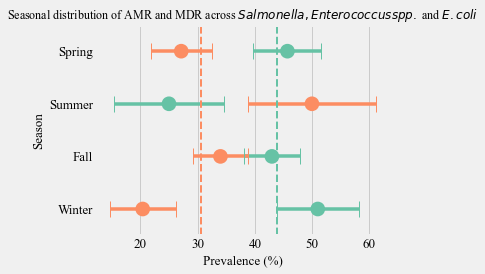

In [77]:
fig, ax = plt.subplots(figsize = [6, 4])

ax.errorbar(data=seg, x='AMR_pc', y='Season', 
            xerr=seg['AMR_SE'].values,yerr = None, ls='none', 
           ecolor='#66c2a5', elinewidth=3.5, capsize=8, barsabove=True,)
sns.pointplot(data=seg, x='AMR_pc', y='Season', join=False, ax = ax, scale=2.5,color ='#66c2a5')
ax.errorbar(data=seg, x='MDR_pc', y='Season', 
            xerr=seg['MDR_SE'].values,yerr = None, ls='none', 
           ecolor = '#fc8d62', elinewidth=3.5, capsize=8, barsabove=True,)
sns.pointplot(data=seg, x='MDR_pc', y='Season', join=False, ax = ax, scale=2.5,color = '#fc8d62')
ax.set_title('Seasonal distribution of AMR and MDR across $Salmonella, Enterococcus spp.$ and $E. coli$', fontsize = 12)
ax.axvline(x = seg.MDR.sum()*100/seg.total.sum(), color = '#fc8d62', linestyle='--', linewidth = 2)
ax.axvline(x = seg.AMR.sum()*100/seg.total.sum(), color = '#66c2a5', linestyle='--', linewidth = 2)
ax.set_xlabel('Prevalence (%)')

plt.tight_layout()
plt.savefig(output_path+'Summplementary_season_Figure.png', dpi=600)
plt.savefig(output_path+'Summplementary_season_Figure.svg')
plt.show()

In [78]:
stats.proportion.proportion_confint(seg.MDR, seg.total)

(0    0.167254
 1    0.280869
 2    0.247155
 3    0.091236
 dtype: float64,
 0    0.375603
 1    0.719131
 2    0.432845
 3    0.316928
 dtype: float64)

In [79]:
stats.proportion.std_prop(seg.MDR/seg.total, seg.total)

0    0.053151
1    0.111803
2    0.047371
3    0.057576
dtype: float64

In [80]:
#q = seg[['AMR_pc', 'MDR_pc', 'No_resistance_pc']].melt()
q = pd.melt(seg, id_vars='Season',value_vars=['AMR_pc', 'MDR_pc'])
q.columns = ['Season', 'Resistance', 'Prevalence']
q.replace('AMR_pc', 'AMR', inplace= True)
q.replace('MDR_pc', 'MDR', inplace= True)
q.replace('No_resistance_pc', 'No_resistance', inplace= True)
q['Cows_str'] = q['Prevalence'].apply('{:.1f}'.format)
q['Cows_str'] = q['Cows_str']+'%'
q['text_pos'] = [52.00, 54.70, 23.00, 60.0, 24.00, 17.1, 53.00, 10.4]
q

,Season,Resistance,Prevalence,Cows_str,text_pos
0,Spring,AMR,45.714286,45.7%,52.0
1,Summer,AMR,25.000000,25.0%,54.7
2,Fall,AMR,43.000000,43.0%,23.0
3,Winter,AMR,51.020408,51.0%,60.0
4,Spring,MDR,27.142857,27.1%,24.0
5,Summer,MDR,50.000000,50.0%,17.1
6,Fall,MDR,34.000000,34.0%,53.0
7,Winter,MDR,20.408163,20.4%,10.4


In [81]:
seg.MDR.sum()*100/seg.total.sum()

30.543933054393307

In [82]:
stats.proportion.proportion_confint(seg.MDR.sum(), seg.total.sum())

(0.247045533822074, 0.36383312726579214)

In [83]:
stats.proportion.std_prop(seg.MDR.sum()/seg.total.sum(), seg.total.sum())

0.029793300888415242

In [84]:
seg.AMR.sum()*100/seg.total.sum()

43.93305439330544

In [85]:
stats.proportion.proportion_confint(seg.AMR.sum(), seg.total.sum())

(0.3764091567967867, 0.5022519310693221)

In [86]:
stats.proportion.std_prop(seg.AMR.sum()/seg.total.sum(), seg.total.sum())

0.03210333844528957

In [87]:
seg

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,32,19,70,45.714286,27.142857,5.954149,5.315141,45.714286,27.142857
1,Summer,5,10,20,25.000000,50.000000,9.682458,11.180340,50.000000,25.000000
2,Fall,43,34,100,43.000000,34.000000,4.950758,4.737088,43.000000,34.000000
3,Winter,25,10,49,51.020408,20.408163,7.141370,5.757556,51.020408,20.408163


In [88]:
stats.proportion.proportion_confint(seg.MDR, seg.total)

(0    0.167254
 1    0.280869
 2    0.247155
 3    0.091236
 dtype: float64,
 0    0.375603
 1    0.719131
 2    0.432845
 3    0.316928
 dtype: float64)

In [89]:
stats.proportion.std_prop(seg.MDR/seg.total, seg.total)

0    0.053151
1    0.111803
2    0.047371
3    0.057576
dtype: float64

In [90]:
stats.proportion.proportion_confint(seg.AMR, seg.total)

(0    0.340444
 1    0.060227
 2    0.332967
 3    0.370236
 dtype: float64,
 0    0.573842
 1    0.439773
 2    0.527033
 3    0.650172
 dtype: float64)

In [91]:
stats.proportion.std_prop(seg.AMR/seg.total, seg.total)

0    0.059541
1    0.096825
2    0.049508
3    0.071414
dtype: float64

## Distribution of culling reasons

In [92]:
data.groupby('MT_Results Individual_CowID').LowMilkCull.max().sum()/data['MT_Results Individual_CowID'].nunique()

0.6512605042016807

In [93]:
stats.proportion.std_prop(data.groupby('MT_Results Individual_CowID').LowMilkCull.max().sum()/data['MT_Results Individual_CowID'].nunique(), data['MT_Results Individual_CowID'].nunique())

0.030891532920378235

In [94]:
def get_mean_sem(column):
    mean = data.groupby('MT_Results Individual_CowID')[column].max().sum()/data['MT_Results Individual_CowID'].nunique()
    sem = stats.proportion.std_prop(data.groupby('MT_Results Individual_CowID')[column].max().sum()/data['MT_Results Individual_CowID'].nunique(), data['MT_Results Individual_CowID'].nunique())
    print('mean= %s, SEM = %s'%(mean, sem))

In [95]:
get_mean_sem(column = 'LowMilkCull')

mean= 0.6512605042016807, SEM = 0.030891532920378235


In [96]:
get_mean_sem(column = 'ReproCull')

mean= 0.31092436974789917, SEM = 0.030003529627430157


In [97]:
get_mean_sem(column = 'LameCull')

mean= 0.10504201680672269, SEM = 0.01987441574765154


In [98]:
get_mean_sem(column = 'MastitisCull')

mean= 0.10084033613445378, SEM = 0.019518528446084395


In [99]:
cow_parameters = ['LowMilkCull',
                  'ReproCull',
                  'LameCull',
                  'MastitisCull',
                  'OtherCull',
                  'AMD',
                  'Ani-Inf',
                  'No-Treatment',
                  'Other',
                  'Tetracycline',
                  'Penicillin',
                  'Ceftiofur',
]
for c in cow_parameters:
    print(c)
    get_mean_sem(c)

LowMilkCull
mean= 0.6512605042016807, SEM = 0.030891532920378235
ReproCull
mean= 0.31092436974789917, SEM = 0.030003529627430157
LameCull
mean= 0.10504201680672269, SEM = 0.01987441574765154
MastitisCull
mean= 0.10084033613445378, SEM = 0.019518528446084395
OtherCull
mean= 0.2647058823529412, SEM = 0.028597223097889608
AMD
mean= 0.15546218487394958, SEM = 0.02348731947781195
Ani-Inf
mean= 0.058823529411764705, SEM = 0.015251852318874456
No-Treatment
mean= 0.8445378151260504, SEM = 0.02348731947781195
Other
mean= 0.008403361344537815, SEM = 0.005917054422290579
Tetracycline
mean= 0.1638655462184874, SEM = 0.023993489048633763
Penicillin
mean= 0.8739495798319328, SEM = 0.021514282118091012
Ceftiofur
mean= 0.8739495798319328, SEM = 0.021514282118091012


# plotting season for E. coli season

In [100]:
def plot_bacteria_season(ax, seg_df, title):
    ax.errorbar(data=seg_df, x='AMR_pc', y='Season', 
                xerr=seg_df['AMR_SE'].values,yerr = None, ls='none', 
               ecolor='#66c2a5', elinewidth=3.5, capsize=8, barsabove=True,)
    sns.pointplot(data=seg_df, x='AMR_pc', y='Season', join=False, ax = ax, scale=2.5,color ='#66c2a5')
    ax.errorbar(data=seg_df, x='MDR_pc', y='Season', 
                xerr=seg_df['MDR_SE'].values,yerr = None, ls='none', 
               ecolor = '#fc8d62', elinewidth=3.5, capsize=8, barsabove=True,)
    sns.pointplot(data=seg_df, x='MDR_pc', y='Season', join=False, ax = ax, scale=2.5,color = '#fc8d62')
    ax.set_title(title, fontsize = 12)
    ax.axvline(x = seg_df.MDR.sum()*100/seg_df.total.sum(), color = '#fc8d62', linestyle='--', linewidth = 2)
    ax.axvline(x = seg_df.AMR.sum()*100/seg_df.total.sum(), color = '#66c2a5', linestyle='--', linewidth = 2)
    ax.set_xlabel('Prevalence (%)')
    return ax

In [101]:
q = data.groupby(['Season', 'Ecoli_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
q

,Season,Resistance,Cows,Cows_str
0,Autumn,No_resistance,65,65
1,Autumn,AMR,31,31
2,Autumn,MDR,4,4
3,Spring,No_resistance,45,45
4,Spring,AMR,24,24
5,Spring,MDR,1,1
6,Summer,No_resistance,16,16
7,Summer,AMR,4,4
8,Summer,MDR,0,0
9,Winter,No_resistance,33,33


In [102]:
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.replace('Autumn', 'Fall', inplace = True)
seg = seg.set_index('Season')
seg = seg.reindex(["Spring", "Summer", "Fall", "Winter"])
seg = seg.reset_index()
seg.head()

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,24,1,70,34.285714,1.428571,5.673323,1.418331,34.285714,1.428571
1,Summer,4,0,20,20.000000,0.000000,8.944272,0.000000,20.000000,0.000000
2,Fall,31,4,100,31.000000,4.000000,4.624932,1.959592,31.000000,4.000000
3,Winter,14,2,49,28.571429,4.081633,6.453628,2.826635,28.571429,4.081633


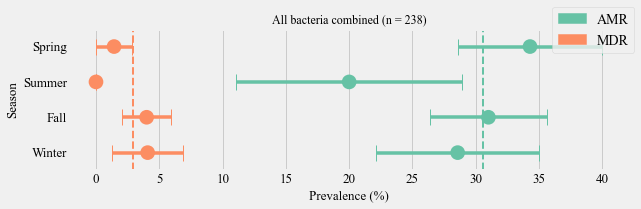

In [103]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

AMR_patch = mpatches.Patch(color='#66c2a5', label='AMR')
MDR_patch = mpatches.Patch(color='#fc8d62', label='MDR')


fig, ax1 = plt.subplots(1, 1, figsize = [9, 3], sharex = True)
plot_bacteria_season(ax = ax1,
                     seg_df = seg.fillna(0), title = "All bacteria combined (n = 238)") 
fig.legend(handles=[AMR_patch, MDR_patch])
plt.tight_layout()
plt.savefig(output_path+"SupplemenratyFigure1.png", dpi = 600)
plt.savefig(output_path+"SupplemenratyFigure1.svg")
plt.show()

In [104]:
q = data.groupby(['Season', 'Ecoli_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.replace('Autumn', 'Fall', inplace = True)
seg = seg.set_index('Season')
seg = seg.reindex(["Spring", "Summer", "Fall", "Winter"])
seg_ecoli = seg.reset_index()
seg_ecoli.head()

"""
p = (ggplot()
 # Range strip
 + geom_segment(
     seg,
     aes(x='min', xend='max', y='Season', yend='Season'),
     size=6,
     color='#042659'
 )
 # Age group markers
 + geom_point(
     q,
     aes('Prevalence', 'Season', color='Resistance', fill='Resistance'),
     size=5,
     stroke=0.7, 

 )
 # Age group percentages
 + geom_text(
     q >> query('Resistance=="AMR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='right',
 )
 + geom_text(
     q >> query('Resistance=="MDR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='left',
 )
 + xlab('Prevalence (%)')+ ylab('Seasons')
 + xlim(0, 65) 
 + geom_vline(xintercept=seg.MDR.sum()*100/seg.total.sum(), color = '#fc8d62', linetype = 'dashed')
 + geom_vline(xintercept=seg.AMR.sum()*100/seg.total.sum(), color = '#66c2a5', linetype = 'dashed')
 + theme_538()
 + scale_y_discrete(limits=['Autumn', 'Summer', 'Spring', 'Winter'])
 #+ scale_x_continuous(breaks=[-5, 0, 10, 20, 30, 40, 50, 60, 70, 80])
 + scale_fill_manual(values=("#66c2a5", "#fc8d62"))
 + scale_color_manual(values=("#66c2a5", "#fc8d62"))
 + labs(title="(b) E. coli (n = 238)", style = "italic")
 + theme(figure_size=(6, 3))
)
ggsave(plot=p, filename=output_path+'Figure1_e.coli.png', dpi=600)
ggsave(plot=p, filename=output_path+'Figure1_e.coli.svg')
p
"""

'\np = (ggplot()\n # Range strip\n + geom_segment(\n     seg,\n     aes(x=\'min\', xend=\'max\', y=\'Season\', yend=\'Season\'),\n     size=6,\n     color=\'#042659\'\n )\n # Age group markers\n + geom_point(\n     q,\n     aes(\'Prevalence\', \'Season\', color=\'Resistance\', fill=\'Resistance\'),\n     size=5,\n     stroke=0.7, \n\n )\n # Age group percentages\n + geom_text(\n     q >> query(\'Resistance=="AMR"\'),\n     aes(x=\'text_pos\', y=\'Season\', label=\'Cows_str\', color=\'Resistance\'),\n     size=12,\n     ha=\'right\',\n )\n + geom_text(\n     q >> query(\'Resistance=="MDR"\'),\n     aes(x=\'text_pos\', y=\'Season\', label=\'Cows_str\', color=\'Resistance\'),\n     size=12,\n     ha=\'left\',\n )\n + xlab(\'Prevalence (%)\')+ ylab(\'Seasons\')\n + xlim(0, 65) \n + geom_vline(xintercept=seg.MDR.sum()*100/seg.total.sum(), color = \'#fc8d62\', linetype = \'dashed\')\n + geom_vline(xintercept=seg.AMR.sum()*100/seg.total.sum(), color = \'#66c2a5\', linetype = \'dashed\')\n + t

In [105]:
seg_ecoli.MDR.sum()*100/seg_ecoli.total.sum()

2.928870292887029

In [106]:
stats.proportion.proportion_confint(seg_ecoli.MDR.sum(), seg_ecoli.total.sum())

(0.007911826239869246, 0.05066557961787134)

In [107]:
stats.proportion.std_prop(seg_ecoli.MDR.sum()/seg_ecoli.total.sum(), seg_ecoli.total.sum())*100

1.0906770153747272

In [108]:
seg_ecoli

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,24,1,70,34.285714,1.428571,5.673323,1.418331,34.285714,1.428571
1,Summer,4,0,20,20.000000,0.000000,8.944272,0.000000,20.000000,0.000000
2,Fall,31,4,100,31.000000,4.000000,4.624932,1.959592,31.000000,4.000000
3,Winter,14,2,49,28.571429,4.081633,6.453628,2.826635,28.571429,4.081633


In [109]:
stats.proportion.proportion_confint(seg_ecoli.MDR, seg_ecoli.total)

(0    0.000000
 1    0.000000
 2    0.001593
 3    0.000000
 dtype: float64,
 0    0.042084
 1    0.000000
 2    0.078407
 3    0.096217
 dtype: float64)

In [110]:
stats.proportion.std_prop(seg_ecoli.MDR/seg_ecoli.total, seg_ecoli.total)

0    0.014183
1    0.000000
2    0.019596
3    0.028266
dtype: float64

In [111]:
stats.proportion.proportion_confint(seg_ecoli.AMR, seg_ecoli.total)

(0    0.231662
 1    0.024695
 2    0.219353
 3    0.159226
 dtype: float64,
 0    0.454052
 1    0.375305
 2    0.400647
 3    0.412203
 dtype: float64)

In [112]:
stats.proportion.std_prop(seg_ecoli.AMR/seg_ecoli.total, seg_ecoli.total)

0    0.056733
1    0.089443
2    0.046249
3    0.064536
dtype: float64

In [113]:
stats.proportion.proportion_confint(29, 100)

(0.20106427201732024, 0.3789357279826797)

In [114]:
q = data.groupby(['Season', 'Entero_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.replace('Autumn', 'Fall', inplace = True)
seg = seg.set_index('Season')
seg = seg.reindex(["Spring", "Summer", "Fall", "Winter"])
seg_entero = seg.reset_index()
seg_entero.head()

"""
q = pd.melt(seg, id_vars='Season',value_vars=['AMR_pc', 'MDR_pc'])
q.columns = ['Season', 'Resistance', 'Prevalence']
q.replace('AMR_pc', 'AMR', inplace= True)
q.replace('MDR_pc', 'MDR', inplace= True)
q.replace('No_resistance_pc', 'No_resistance', inplace= True)
q['Cows_str'] = q['Prevalence'].apply('{:.1f}'.format)
q['Cows_str'] = q['Cows_str']+'%'
q['text_pos'] = [52.00, 42.4, 12.0, 60.0, 18.2, 14.7, 53.0, 1.5]
print(q.head(15))

p = (ggplot()
 # Range strip
 + geom_segment(
     seg,
     aes(x='min', xend='max', y='Season', yend='Season'),
     size=6,
     color='#042659'
 )
 # Age group markers
 + geom_point(
     q,
     aes('Prevalence', 'Season', color='Resistance', fill='Resistance'),
     size=5,
     stroke=0.7, 

 )
 # Age group percentages
 + geom_text(
     q >> query('Resistance=="AMR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='right',
 )
 + geom_text(
     q >> query('Resistance=="MDR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='left',
 )
 + xlab('Prevalence (%)')+ ylab('Seasons')
 + xlim(0, 65) 
 + geom_vline(xintercept=seg.MDR.sum()*100/seg.total.sum(), color = '#fc8d62', linetype = 'dashed')
 + geom_vline(xintercept=seg.AMR.sum()*100/seg.total.sum(), color = '#66c2a5', linetype = 'dashed')
 + theme_538()
 + scale_y_discrete(limits=['Autumn', 'Summer', 'Spring', 'Winter'])
 #+ scale_x_continuous(breaks=[-5, 0, 10, 20, 30, 40, 50, 60, 70, 80])
 + scale_fill_manual(values=("#66c2a5", "#fc8d62"))
 + scale_color_manual(values=("#66c2a5", "#fc8d62"))
     + labs(title="(c) Enterococcus sp. (n = 238)", style = "italic")
 + theme(figure_size=(6, 3))
)
ggsave(plot=p, filename=output_path+'Figure1_entero.png', dpi=600)
ggsave(plot=p, filename=output_path+'Figure1_entero.svg')
p
"""

'\nq = pd.melt(seg, id_vars=\'Season\',value_vars=[\'AMR_pc\', \'MDR_pc\'])\nq.columns = [\'Season\', \'Resistance\', \'Prevalence\']\nq.replace(\'AMR_pc\', \'AMR\', inplace= True)\nq.replace(\'MDR_pc\', \'MDR\', inplace= True)\nq.replace(\'No_resistance_pc\', \'No_resistance\', inplace= True)\nq[\'Cows_str\'] = q[\'Prevalence\'].apply(\'{:.1f}\'.format)\nq[\'Cows_str\'] = q[\'Cows_str\']+\'%\'\nq[\'text_pos\'] = [52.00, 42.4, 12.0, 60.0, 18.2, 14.7, 53.0, 1.5]\nprint(q.head(15))\n\np = (ggplot()\n # Range strip\n + geom_segment(\n     seg,\n     aes(x=\'min\', xend=\'max\', y=\'Season\', yend=\'Season\'),\n     size=6,\n     color=\'#042659\'\n )\n # Age group markers\n + geom_point(\n     q,\n     aes(\'Prevalence\', \'Season\', color=\'Resistance\', fill=\'Resistance\'),\n     size=5,\n     stroke=0.7, \n\n )\n # Age group percentages\n + geom_text(\n     q >> query(\'Resistance=="AMR"\'),\n     aes(x=\'text_pos\', y=\'Season\', label=\'Cows_str\', color=\'Resistance\'),\n     size=

In [115]:
data['F_Salmonella PCR_Result'].value_counts()

Negative        152
Positive         61
Inconclusive     30
Name: F_Salmonella PCR_Result, dtype: int64

In [116]:
seg_entero

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,22,18,70,31.428571,25.714286,5.548619,5.223852,31.428571,25.714286
1,Summer,3,10,20,15.000000,50.000000,7.984360,11.180340,50.000000,15.000000
2,Fall,41,29,100,41.000000,29.000000,4.918333,4.537621,41.000000,29.000000
3,Winter,24,6,49,48.979592,12.244898,7.141370,4.682909,48.979592,12.244898


In [117]:
seg_entero.MDR.sum()*100/seg_entero.total.sum()

26.359832635983263

In [118]:
stats.proportion.proportion_confint(seg_entero.MDR.sum(), seg_entero.total.sum())

(0.20774129528899793, 0.3194553574306674)

In [119]:
stats.proportion.std_prop(seg_entero.MDR.sum()/seg_entero.total.sum(), seg_entero.total.sum())

0.028499008916198394

In [120]:
stats.proportion.proportion_confint(seg_entero.MDR, seg_entero.total)

(0    0.154757
 1    0.280869
 2    0.201064
 3    0.030666
 dtype: float64,
 0    0.359528
 1    0.719131
 2    0.378936
 3    0.214232
 dtype: float64)

In [121]:
stats.proportion.std_prop(seg_entero.MDR/seg_entero.total, seg_entero.total)

0    0.052239
1    0.111803
2    0.045376
3    0.046829
dtype: float64

In [122]:
stats.proportion.proportion_confint(seg_entero.AMR, seg_entero.total)

(0    0.205535
 1    0.000000
 2    0.313602
 3    0.349828
 dtype: float64,
 0    0.423037
 1    0.306491
 2    0.506398
 3    0.629764
 dtype: float64)

In [123]:
stats.proportion.std_prop(seg_entero.AMR/seg_entero.total, seg_entero.total)

0    0.055486
1    0.079844
2    0.049183
3    0.071414
dtype: float64

In [124]:
stats.proportion.proportion_confint(10, 20)

(0.28086936485585456, 0.7191306351441454)

In [125]:
stats.proportion.std_prop(10/20, 20)

0.11180339887498948

In [126]:
stats.proportion.proportion_confint(24, 49)

(0.34982764791967025, 0.6297641888150236)

In [127]:
stats.proportion.std_prop(24/49, 49)

0.071413695124874

In [128]:
stats.proportion.proportion_confint(7, 49)

(0.044879353543769165, 0.24083493217051655)

In [129]:
stats.proportion.std_prop(7/49, 49)

0.049989586587411795

In [130]:
q = sal_d.groupby(['Season', 'Sal_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg

Resistance,No_resistance,AMR,MDR
Season,,,
Autumn,13,11,2
Spring,8,4,1
Winter,13,4,2


#sal_d = data[data['F_Salmonella PCR_Result'] == 'Positive']
q = sal_d.groupby(['Season', 'Sal_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
print(seg.head())

q = pd.melt(seg, id_vars='Season',value_vars=['AMR_pc', 'MDR_pc'])
q.columns = ['Season', 'Resistance', 'Prevalence']
q.replace('AMR_pc', 'AMR', inplace= True)
q.replace('MDR_pc', 'MDR', inplace= True)
q.replace('No_resistance_pc', 'No_resistance', inplace= True)
q['Cows_str'] = q['Prevalence'].apply('{:.1f}'.format)
q['Cows_str'] = q['Cows_str']+'%'
q

#sal_d = data[data['F_Salmonella PCR_Result'] == 'Positive']
q = sal_d.groupby(['Season', 'Sal_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
print(seg.head())

seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg

In [131]:
#seg.MDR.sum()*100/seg.total.sum()

In [132]:
#seg.AMR.sum()*100/seg.total.sum()

In [133]:
#sal_d = data[data['F_Salmonella PCR_Result'] == 'Positive']
q = sal_d.groupby(['Season', 'Sal_R'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
seg = q.pivot(index='Season', columns= 'Resistance', values='Cows')
seg.columns = ['No_resistance', 'AMR', 'MDR']
seg.fillna(0, inplace = True)
seg['total'] = seg.AMR+ seg.MDR+ seg.No_resistance
seg = seg.drop('No_resistance', axis=1)
seg['AMR_pc'] = (seg.AMR*100)/(seg['total'])
seg['MDR_pc'] = (seg.MDR*100)/(seg['total'])
seg['AMR_SE'] = stats.proportion.std_prop(seg.AMR/seg.total, seg.total)*100
seg['MDR_SE'] = stats.proportion.std_prop(seg.MDR/seg.total, seg.total)*100
seg['max'] = seg[['AMR_pc', 'MDR_pc']].max(axis=1)
seg['min'] =  seg[['AMR_pc', 'MDR_pc']].min(axis=1)
seg = seg.reset_index()
seg.replace('Autumn', 'Fall', inplace = True)
seg = seg.set_index('Season')
seg = seg.reindex(["Spring", "Summer", "Fall", "Winter"])
seg_sal = seg.reset_index()
seg_sal.head()
"""
q = pd.melt(seg, id_vars='Season',value_vars=['AMR_pc', 'MDR_pc'])
q.columns = ['Season', 'Resistance', 'Prevalence']
q.replace('AMR_pc', 'AMR', inplace= True)
q.replace('MDR_pc', 'MDR', inplace= True)
q.replace('No_resistance_pc', 'No_resistance', inplace= True)
q['Cows_str'] = q['Prevalence'].apply('{:.1f}'.format)
q['Cows_str'] = q['Cows_str']+'%'
q['text_pos'] = [53.3, 42.8, 32.1, 10.7, 10.7, 0.0]
print(q.head(15))

p = (ggplot()
 # Range strip
 + geom_segment(
     seg,
     aes(x='min', xend='max', y='Season', yend='Season'),
     size=6,
     color='#042659'
 )
 # Age group markers
 + geom_point(
     q,
     aes('Prevalence', 'Season', color='Resistance', fill='Resistance'),
     size=5,
     stroke=0.7, 

 )
 # Age group percentages
 + geom_text(
     q >> query('Resistance=="AMR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='right',
 )
 + geom_text(
     q >> query('Resistance=="MDR"'),
     aes(x='text_pos', y='Season', label='Cows_str', color='Resistance'),
     size=12,
     ha='left',
 )
 + xlab('Prevalence (%)')+ ylab('Seasons')
 + xlim(0, 65) 
 + geom_vline(xintercept=seg.MDR.sum()*100/seg.total.sum(), color = '#fc8d62', linetype = 'dashed')
 + geom_vline(xintercept=seg.AMR.sum()*100/seg.total.sum(), color = '#66c2a5', linetype = 'dashed')
 + theme_538()
 + scale_y_discrete(limits=['Autumn', 'Summer', 'Spring', 'Winter'])
 #+ scale_x_continuous(breaks=[-5, 0, 10, 20, 30, 40, 50, 60, 70, 80])
 + scale_fill_manual(values=("#66c2a5", "#fc8d62"))
 + scale_color_manual(values=("#66c2a5", "#fc8d62"))
     + labs(title="(a) Salmonella (n = 58)", style = "italic")
 + theme(figure_size=(6, 3))
)
ggsave(plot=p, filename=output_path+'Figure1_sal.png', dpi=600)
ggsave(plot=p, filename=output_path+'Figure1_sal.svg')
p
"""

'\nq = pd.melt(seg, id_vars=\'Season\',value_vars=[\'AMR_pc\', \'MDR_pc\'])\nq.columns = [\'Season\', \'Resistance\', \'Prevalence\']\nq.replace(\'AMR_pc\', \'AMR\', inplace= True)\nq.replace(\'MDR_pc\', \'MDR\', inplace= True)\nq.replace(\'No_resistance_pc\', \'No_resistance\', inplace= True)\nq[\'Cows_str\'] = q[\'Prevalence\'].apply(\'{:.1f}\'.format)\nq[\'Cows_str\'] = q[\'Cows_str\']+\'%\'\nq[\'text_pos\'] = [53.3, 42.8, 32.1, 10.7, 10.7, 0.0]\nprint(q.head(15))\n\np = (ggplot()\n # Range strip\n + geom_segment(\n     seg,\n     aes(x=\'min\', xend=\'max\', y=\'Season\', yend=\'Season\'),\n     size=6,\n     color=\'#042659\'\n )\n # Age group markers\n + geom_point(\n     q,\n     aes(\'Prevalence\', \'Season\', color=\'Resistance\', fill=\'Resistance\'),\n     size=5,\n     stroke=0.7, \n\n )\n # Age group percentages\n + geom_text(\n     q >> query(\'Resistance=="AMR"\'),\n     aes(x=\'text_pos\', y=\'Season\', label=\'Cows_str\', color=\'Resistance\'),\n     size=12,\n     ha=

In [134]:
stats.proportion.proportion_confint(seg_sal.MDR.sum(), seg_sal.total.sum())

(0.01397499673820618, 0.1584387963652421)

In [135]:
stats.proportion.std_prop(seg_sal.MDR.sum()/seg_sal.total.sum(), seg_sal.total.sum())

0.036853687304090256

In [136]:
seg_sal.MDR.sum()*100/seg_sal.total.sum()

8.620689655172415

In [137]:
seg_sal

,Season,AMR,MDR,total,AMR_pc,MDR_pc,AMR_SE,MDR_SE,max,min
0,Spring,4.0,1.0,13.0,30.769231,7.692308,12.800774,7.390530,30.769231,7.692308
1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fall,11.0,2.0,26.0,42.307692,7.692308,9.689067,5.225894,42.307692,7.692308
3,Winter,4.0,2.0,19.0,21.052632,10.526316,9.352877,7.040590,21.052632,10.526316


In [138]:
stats.proportion.proportion_confint(seg_sal.MDR, seg_sal.total)

(0    0.0
 1    NaN
 2    0.0
 3    0.0
 dtype: float64,
 0    0.221775
 1         NaN
 2    0.179349
 3    0.243256
 dtype: float64)

In [139]:
stats.proportion.std_prop(seg_sal.MDR/seg_sal.total, seg_sal.total)

0    0.073905
1         NaN
2    0.052259
3    0.070406
dtype: float64

In [140]:
stats.proportion.proportion_confint(seg_sal.AMR, seg_sal.total)

(0    0.056802
 1         NaN
 2    0.233175
 3    0.027213
 dtype: float64,
 0    0.558583
 1         NaN
 2    0.612979
 3    0.393839
 dtype: float64)

In [141]:
stats.proportion.std_prop(seg_sal.AMR/seg_sal.total, seg_sal.total)

0    0.128008
1         NaN
2    0.096891
3    0.093529
dtype: float64

In [142]:
stats.proportion.proportion_confint(17, 26)

(0.4709798089057342, 0.8367124987865735)

In [143]:
stats.proportion.std_prop(17/26, 26)

0.09330087000722768

In [144]:
len(sal_d['MT_Results Individual_CowID'].unique())

58

In [145]:
#!pip install latex

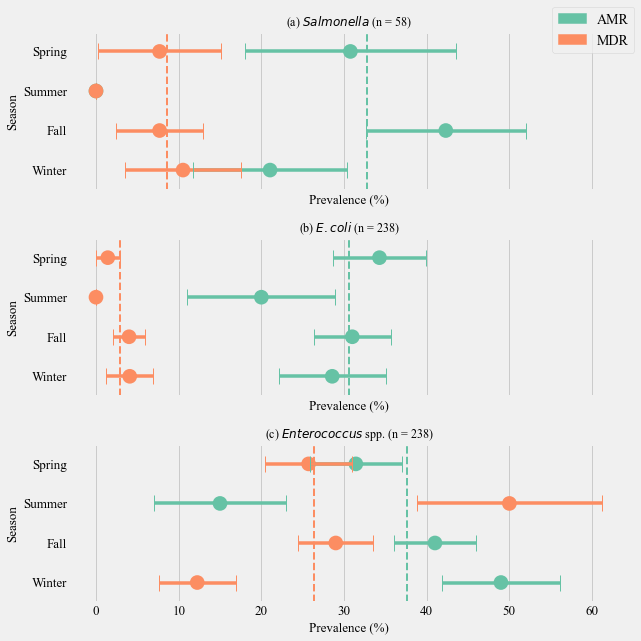

In [229]:
def plot_bacteria_season(ax, seg_df, title):
    ax.errorbar(data=seg_df, x='AMR_pc', y='Season', 
                xerr=seg_df['AMR_SE'].values,yerr = None, ls='none', 
               ecolor='#66c2a5', elinewidth=3.5, capsize=8, barsabove=True,)
    sns.pointplot(data=seg_df, x='AMR_pc', y='Season', join=False, ax = ax, scale=2.5,color ='#66c2a5')
    ax.errorbar(data=seg_df, x='MDR_pc', y='Season', 
                xerr=seg_df['MDR_SE'].values,yerr = None, ls='none', 
               ecolor = '#fc8d62', elinewidth=3.5, capsize=8, barsabove=True,)
    sns.pointplot(data=seg_df, x='MDR_pc', y='Season', join=False, ax = ax, scale=2.5,color = '#fc8d62')
    ax.set_title(title, fontsize = 12)
    ax.axvline(x = seg_df.MDR.sum()*100/seg_df.total.sum(), color = '#fc8d62', linestyle='--', linewidth = 2)
    ax.axvline(x = seg_df.AMR.sum()*100/seg_df.total.sum(), color = '#66c2a5', linestyle='--', linewidth = 2)
    ax.set_xlabel('Prevalence (%)')
    return ax

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rc

# activate latex text rendering
#rc('text', usetex=True)

AMR_patch = mpatches.Patch(color='#66c2a5', label='AMR')
MDR_patch = mpatches.Patch(color='#fc8d62', label='MDR')


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = [9, 9], sharex = True)
#plot_bacteria_season(ax = ax1,
#                     seg_df = seg_sal.fillna(0), title = r"(a) \textit{Salmonella} (n = 58)")
plot_bacteria_season(ax = ax1,
                     seg_df = seg_sal.fillna(0), title = "(a) $\it{Salmonella}$ (n = 58)")

#plot_bacteria_season(ax = ax2,
#                     seg_df = seg_ecoli, title = r"(b) \textit{E. coli} (n = 238)")
plot_bacteria_season(ax = ax2,
                     seg_df = seg_ecoli, title = "(b) $\it{E. coli}$ (n = 238)")

#plot_bacteria_season(ax = ax3,
#                     seg_df = seg_entero, title = r"(c) \textit{Enterococcus} spp. (n = 238)")
plot_bacteria_season(ax = ax3,
                     seg_df = seg_entero, title = "(c) $\it{Enterococcus}$ spp. (n = 238)")
fig.legend(handles=[AMR_patch, MDR_patch])
plt.tight_layout()
plt.savefig(output_path+"Figure1.png", dpi = 600)
plt.savefig(output_path+"Figure1.svg")
plt.show()

In [147]:
data['MT_Results Individual_CowID'].shape

(243,)

In [148]:
len(data['MT_Results Individual_CowID'].unique())

238

In [149]:
data.groupby(['Ecoli_R'])['MT_Results Individual_CowID'].nunique()*100/len(data['MT_Results Individual_CowID'].unique())

Ecoli_R
0    66.386555
1    30.672269
2     2.941176
Name: MT_Results Individual_CowID, dtype: float64

In [150]:
data.groupby(['Entero_R'])['MT_Results Individual_CowID'].nunique()*100/len(data['MT_Results Individual_CowID'].unique())

Entero_R
0    36.134454
1    37.815126
2    26.470588
Name: MT_Results Individual_CowID, dtype: float64

In [151]:
sal_d.Season.unique()

array(['Autumn', 'Winter', 'Spring'], dtype=object)

In [152]:
sal_d.groupby(['Sal_R'])['MT_Results Individual_CowID'].nunique()*100/len(sal_d['MT_Results Individual_CowID'].unique())

Sal_R
0    58.620690
1    32.758621
2     8.620690
Name: MT_Results Individual_CowID, dtype: float64

In [153]:
data.groupby(['Season', 'Ecoli_R'])['MT_Results Individual_CowID'].nunique()

Season  Ecoli_R
Autumn  0          65
        1          31
        2           4
Spring  0          45
        1          24
        2           1
Summer  0          16
        1           4
        2           0
Winter  0          33
        1          14
        2           2
Name: MT_Results Individual_CowID, dtype: int64

In [154]:
data.filter(like='R_').columns.tolist()

['F_Salmonella PCR_Result',
 'F_AMR_CowID',
 'SR_FOX',
 'SR_AZI',
 'SR_CHL',
 'SR_TET',
 'SR_AXO',
 'SR_AUG2',
 'SR_CIP',
 'SR_GEN',
 'SR_Nal',
 'SR_XNL',
 'SR_FIS',
 'SR_SXT',
 'SR_AMP',
 'SR_STR',
 'MT_Results Individual F_AMR_Number of drugs Resistant',
 'MT_Results Individual F_AMR_Number of drugs Susceptable',
 'Entero_DrugsR_t',
 'Ecoli_DrugsR_t',
 'Sal_DrugsR_t',
 'R_n',
 'R_commensal',
 'R_commensal_n',
 'Sal_AbR_n',
 'Entero_AbR_n',
 'Ecoli_AbR_n',
 'R_factor']

In [155]:
q = data.groupby(['Season', 'R_factor'])['MT_Results Individual_CowID'].nunique().reset_index()
q.columns= ['Season', 'Resistance', 'Cows']
q.Resistance.replace(1, 'AMR', inplace = True)
q.Resistance.replace(2, 'MDR', inplace = True)
q.Resistance.replace(0, 'No_resistance', inplace = True)
q['Cows_str'] = q.Cows.apply(str)
q.head()

,Season,Resistance,Cows,Cows_str
0,Autumn,No_resistance,23,23
1,Autumn,AMR,43,43
2,Autumn,MDR,34,34
3,Spring,No_resistance,19,19
4,Spring,AMR,32,32


In [156]:
df   = data[['CowID','Ecoli_AbR','Entero_AbR', 'Sal_AbR', 'R_commensal', 'R', 'R_factor', 'Entero_DrugsR', 'Sal_DrugsR', 'Ecoli_DrugsR', 'Dairy ID']]
df.head()

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5


In [157]:
df['DrugsR_commensal'] = (df['Entero_DrugsR']+ df['Ecoli_DrugsR']).apply(set)

In [158]:
sharing = []
for index, row in df.iterrows():
    c = row['DrugsR_commensal']
    d = row['Sal_DrugsR']
    share = set(d).intersection(set(c))
    sharing.append(share)
df['sharing'] = sharing
df.head()

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID,DrugsR_commensal,sharing
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5,"{CIP, ERY, NIT}",{}
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5,"{CHL, LIN, ERY, CIP, LZD, TET}",{}
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5,"{CHL, NIT, TET}",{}
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5,"{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",{}
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5,"{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",{}


In [159]:
sharing_2 = []
for index, row in df.iterrows():
    c = row['Ecoli_DrugsR']
    d = row['Entero_DrugsR']
    share = set(d).intersection(set(c))
    sharing_2.append(share)
df['sharing_2'] = sharing_2
df.head()

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID,DrugsR_commensal,sharing,sharing_2
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5,"{CIP, ERY, NIT}",{},{}
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5,"{CHL, LIN, ERY, CIP, LZD, TET}",{},{}
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5,"{CHL, NIT, TET}",{},{}
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5,"{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",{},{}
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5,"{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",{},{}


In [160]:
df.Sal_AbR.astype(str).value_counts()

[]                                                               218
['Tetracyclines']                                                 10
['Penicillins', 'Tetracyclines', 'Amphenicols']                    4
['Penicillins']                                                    3
['Penicillins', 'Tetracyclines']                                   2
['Folate pathway antagonist']                                      2
['Penicillins', 'Amphenicols']                                     1
['Tetracyclines', 'Folate pathway antagonist']                     1
['Penicillins', 'Tetracyclines', 'Folate pathway antagonist']      1
['Amphenicols']                                                    1
Name: Sal_AbR, dtype: int64

In [161]:
df.head()

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID,DrugsR_commensal,sharing,sharing_2
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5,"{CIP, ERY, NIT}",{},{}
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5,"{CHL, LIN, ERY, CIP, LZD, TET}",{},{}
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5,"{CHL, NIT, TET}",{},{}
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5,"{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",{},{}
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5,"{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",{},{}


In [162]:
a = df.Sal_DrugsR.astype(str).value_counts().reset_index()
a.columns = ['Antibiotic', 'Sal_DrugsR']
a = a[a.Antibiotic != '[]']
a['SM_DRUGS_pc'] = a.Sal_DrugsR*100/a.Sal_DrugsR.sum()
lower, upper =stats.proportion.proportion_confint(a.Sal_DrugsR, a.Sal_DrugsR.sum())
a['lower'] =lower
a['upper'] =upper
a['SE'] = stats.proportion.std_prop(a.Sal_DrugsR/a.Sal_DrugsR.sum(), a.Sal_DrugsR.sum())*100
a

,Antibiotic,Sal_DrugsR,SM_DRUGS_pc,lower,upper,SE
1,['TET'],9,31.034483,0.141966,0.478724,8.590912
2,"['FOX', 'CHL', 'TET', 'AXO', 'AUG2', 'XNL', 'A...",4,13.793103,0.012429,0.263433,6.403288
3,['XNL'],2,6.896552,0.000000,0.161190,4.705436
4,"['TET', 'AMP']",2,6.896552,0.000000,0.161190,4.705436
5,['SXT'],2,6.896552,0.000000,0.161190,4.705436
6,['AMP'],2,6.896552,0.000000,0.161190,4.705436
7,"['TET', 'AXO', 'GEN']",1,3.448276,0.000000,0.100892,3.388301
8,"['TET', 'SXT']",1,3.448276,0.000000,0.100892,3.388301
9,['FOX'],1,3.448276,0.000000,0.100892,3.388301
10,"['CHL', 'AXO', 'AUG2', 'GEN']",1,3.448276,0.000000,0.100892,3.388301


In [163]:
data[data.Sal_DrugsR.astype(str) == "['FOX', 'CHL', 'TET', 'AXO', 'AUG2', 'XNL', 'AMP', 'STR']"]

,Dairy ID,MT_Results Individual_CowID,Date,Accession,Org1,Org2,F_Salmonella PCR_Result,SampleID2,CollectionDate,F_AMR_CowID,...,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Antibiotics,Penicillin,Tetracycline,Ceftiofur,Resitance
50,4,8680,2015-09-17,T1502211,Salmonella sp.,NaN,Positive,F51,17-Sep-15,8680.0,...,2,2,0,1,1,"Penicillin, Ceftiofur, Ceftiofur",1,0,1,multi drug resistance
52,4,9718,2015-09-17,T1502211,Salmonella sp.,NaN,Positive,F53,17-Sep-15,9718.0,...,2,2,0,2,2,"Penicillin, Ceftiofur, Ceftiofur",1,0,1,multi drug resistance
139,3,38617,2016-02-04,T1600270,NaN,NaN,Positive,F137,04-Feb-16,38617.0,...,2,2,0,1,1,"Ceftiofur, Penicillin, Ceftiofur",1,0,1,multi drug resistance
152,6,2393,2016-02-04,T1600270,NaN,NaN,Positive,F150,04-Feb-16,2393.0,...,2,2,1,0,1,"Penicillin, Penicillin, Ceftiofur",1,0,1,multi drug resistance


In [164]:
print(pd.__version__)

1.0.5


In [165]:
data[data.Sal_DrugsR.astype(str) == "['FOX', 'CHL', 'TET', 'AXO', 'AUG2', 'XNL', 'AMP', 'STR']"].Sal_AbR.iloc[0]

['Penicillins', 'Tetracyclines', 'Amphenicols']

In [166]:
a = pd.DataFrame(data[data['F_Salmonella PCR_Result'] == 'Positive'].groupby('R_factor')['MT_Results Individual_CowID'].count()/data[data['F_Salmonella PCR_Result'] == 'Positive'].shape[0])
a.colums = ['Sal_prev']

In [167]:
a = pd.DataFrame(data[data['F_Salmonella PCR_Result'] == 'Positive'].groupby('R_factor')['MT_Results Individual_CowID'].count()/data[data['F_Salmonella PCR_Result'] == 'Positive'].shape[0])
a

,MT_Results Individual_CowID
R_factor,
0,0.098361
1,0.557377
2,0.344262


In [168]:
data[data['F_Salmonella PCR_Result'] == 'Positive'].groupby('R_factor')['MT_Results Individual_CowID'].count()

R_factor
0     6
1    34
2    21
Name: MT_Results Individual_CowID, dtype: int64

In [169]:
stats.proportion.proportion_confint(
    data[data['F_Salmonella PCR_Result'] == 'Positive'].groupby(
        'R_factor')['MT_Results Individual_CowID'].count(),
    data[data['F_Salmonella PCR_Result'] == 'Positive'].shape[0])

(R_factor
 0    0.023628
 1    0.432732
 2    0.225030
 dtype: float64,
 R_factor
 0    0.173093
 1    0.682022
 2    0.463494
 dtype: float64)

In [170]:
a = df.Entero_AbR.value_counts().reset_index()
a = a.iloc[1:]
a.columns = ['Antibiotic', 'Entero_DRUGS']
a = a[a.Antibiotic != '[]']
a['SM_DRUGS_pc'] = a.Entero_DRUGS*100/a.Entero_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.Entero_DRUGS, a.Entero_DRUGS.sum())
std_error = stats.proportion.std_prop(a.Entero_DRUGS/a.Entero_DRUGS.sum(), a.Entero_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error*100
a['Antimicorbial Class'] = [','.join(map(str, l)) for l in a.Antibiotic]
a['lower'] = a.lower*100
a['upper'] = a.upper*100
a['95%CI']  = a.lower.round(3).astype(str) +'-'+ a.upper.round(3).astype(str)
a['Prevalence (%)'] = a.SM_DRUGS_pc.round(2)
a['Number of Cows'] = a.Entero_DRUGS
#a['SE'] = stats.proportion.std_prop(a.Entero_DRUGS/a.Entero_DRUGS.sum(), a.Sal_DrugsR.sum())*100
aa = a[['Antimicorbial Class', 'Number of Cows', 'Prevalence (%)', '95%CI', 'std_error']]
print(aa.head())
aa.to_excel(output_path+'/Entero_resistance_phenotype.xlsx')
aa

                                 Antimicorbial Class  Number of Cows  \
1                           Nitrofuran antibacterial              17   
2                                         Macrolides              15   
3                Macrolides,Nitrofuran antibacterial              15   
4  Macrolides,Oxazolidinones,Nitrofuran antibacte...               9   
5            Oxazolidinones,Nitrofuran antibacterial               8   

   Prevalence (%)         95%CI  std_error  
1           10.83  5.967-15.689   2.479928  
2            9.55  4.956-14.152   2.346067  
3            9.55  4.956-14.152   2.346067  
4            5.73   2.096-9.369   1.855251  
5            5.10   1.656-8.535   1.755047  


,Antimicorbial Class,Number of Cows,Prevalence (%),95%CI,std_error
1,Nitrofuran antibacterial,17,10.83,5.967-15.689,2.479928
2,Macrolides,15,9.55,4.956-14.152,2.346067
3,"Macrolides,Nitrofuran antibacterial",15,9.55,4.956-14.152,2.346067
4,"Macrolides,Oxazolidinones,Nitrofuran antibacte...",9,5.73,2.096-9.369,1.855251
5,"Oxazolidinones,Nitrofuran antibacterial",8,5.10,1.656-8.535,1.755047
6,Tetracyclines,7,4.46,1.23-7.687,1.647196
7,"Tetracyclines,Nitrofuran antibacterial",6,3.82,0.823-6.821,1.530082
8,Oxazolidinones,6,3.82,0.823-6.821,1.530082
9,"Tetracyclines,Macrolides,Nitrofuran antibacterial",6,3.82,0.823-6.821,1.530082
10,"Macrolides,Oxazolidinones,Nitrofuran antibacte...",5,3.18,0.438-5.931,1.401385


In [171]:
a.Entero_DRUGS.sum()

157

In [172]:
stats.proportion.proportion_confint(23, 157)

(0.09118537982238738, 0.201808250750861)

In [173]:
a = df.Entero_AbR.astype(str).value_counts().reset_index()
a.columns = ['Antibiotic', 'Entero_DRUGS']
a = a[a.Antibiotic != '[]']
a['SM_DRUGS_pc'] = a.Entero_DRUGS*100/a.Entero_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.Entero_DRUGS, a.Entero_DRUGS.sum())
std_error = stats.proportion.std_prop(a.Entero_DRUGS/a.Entero_DRUGS.sum(), a.Entero_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error*100
a

,Antibiotic,Entero_DRUGS,SM_DRUGS_pc,lower,upper,std_error
1,['Nitrofuran antibacterial'],17,10.828025,0.059675,0.156886,2.479928
2,"['Macrolides', 'Nitrofuran antibacterial']",15,9.554140,0.049559,0.141523,2.346067
3,['Macrolides'],15,9.554140,0.049559,0.141523,2.346067
4,"['Macrolides', 'Oxazolidinones', 'Nitrofuran a...",9,5.732484,0.020963,0.093687,1.855251
5,"['Oxazolidinones', 'Nitrofuran antibacterial']",8,5.095541,0.016557,0.085354,1.755047
6,['Tetracyclines'],7,4.458599,0.012302,0.076870,1.647196
7,['Oxazolidinones'],6,3.821656,0.008228,0.068206,1.530082
8,"['Tetracyclines', 'Macrolides', 'Nitrofuran an...",6,3.821656,0.008228,0.068206,1.530082
9,"['Tetracyclines', 'Nitrofuran antibacterial']",6,3.821656,0.008228,0.068206,1.530082
10,"['Macrolides', 'Oxazolidinones', 'Nitrofuran a...",5,3.184713,0.004381,0.059314,1.401385


In [174]:
a.iloc[3].Antibiotic

"['Macrolides', 'Oxazolidinones', 'Nitrofuran antibacterial']"

In [175]:
a = df.Entero_DrugsR.astype(str).value_counts().reset_index()
a.columns = ['Antibiotic', 'Entero_DRUGS']
a = a[a.Antibiotic != '[]']
a['Entero_DrugsR_PC'] = a.Entero_DRUGS*100/a.Entero_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.Entero_DRUGS, a.Entero_DRUGS.sum())
std_error = stats.proportion.std_prop(a.Entero_DRUGS/a.Entero_DRUGS.sum(), a.Entero_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error*100
a

,Antibiotic,Entero_DRUGS,Entero_DrugsR_PC,lower,upper,std_error
1,['LIN'],19,10.160428,0.058301,0.144907,2.209373
2,"['CIP', 'LIN']",11,5.882353,0.025100,0.092547,1.720641
3,"['NIT', 'LIN']",7,3.743316,0.010227,0.064640,1.388107
4,"['NIT', 'CIP', 'LIN']",6,3.208556,0.006827,0.057344,1.288702
5,"['NIT', 'ERY', 'CIP']",6,3.208556,0.006827,0.057344,1.288702
...,...,...,...,...,...,...
97,"['TET', 'CHL', 'TYLT', 'SYN', 'LZD', 'ERY', 'C...",1,0.534759,0.000000,0.015801,0.533328
98,"['TET', 'CHL', 'TYLT', 'SYN', 'LZD', 'NIT', 'E...",1,0.534759,0.000000,0.015801,0.533328
99,"['SYN', 'NIT', 'KAN', 'LIN']",1,0.534759,0.000000,0.015801,0.533328
100,"['TET', 'CHL', 'NIT', 'KAN', 'ERY', 'CIP', 'LIN']",1,0.534759,0.000000,0.015801,0.533328


In [176]:
data[data.Entero_DrugsR.astype(str) == "['NIT', 'ERY', 'CIP']"].Entero_AbR.astype(str).unique()

array(["['Macrolides', 'Nitrofuran antibacterial']"], dtype=object)

In [177]:
a = df.Ecoli_AbR.astype(str).value_counts().reset_index()
a.columns = ['Antibiotic', 'ECOLI_DRUGS']
a = a[a.Antibiotic != '[]']
a['SM_DRUGS_pc'] = a.ECOLI_DRUGS*100/a.ECOLI_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.ECOLI_DRUGS, a.ECOLI_DRUGS.sum())
std_error = stats.proportion.std_prop(a.ECOLI_DRUGS/a.ECOLI_DRUGS.sum(), a.ECOLI_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error*100
a

,Antibiotic,ECOLI_DRUGS,SM_DRUGS_pc,lower,upper,std_error
1,['Tetracyclines'],25,30.864198,0.208045,0.409239,5.132589
2,['Aminoglycosides'],11,13.580247,0.061198,0.210407,3.806430
3,['Cephalosporins'],9,11.111111,0.042671,0.179551,3.491885
4,"['Aminoglycosides', 'Tetracyclines']",7,8.641975,0.025229,0.147610,3.122032
5,['Folate pathway antagonist'],5,6.172840,0.009319,0.114138,2.674018
6,['Amphenicols'],5,6.172840,0.009319,0.114138,2.674018
7,"['Cephalosporins', 'Tetracyclines']",5,6.172840,0.009319,0.114138,2.674018
8,"['Cephalosporins', 'Amphenicols']",2,2.469136,0.000000,0.058486,1.724253
9,"['Aminoglycosides', 'Tetracyclines', 'Amphenic...",2,2.469136,0.000000,0.058486,1.724253
10,"['Aminoglycosides', 'Cephalosporins', 'Tetracy...",1,1.234568,0.000000,0.036393,1.226923


In [178]:
a = df.Ecoli_AbR.value_counts().reset_index()
a = a.iloc[1:]
a.columns = ['Antibiotic', 'Entero_DRUGS']
a = a[a.Antibiotic != '[]']
a['SM_DRUGS_pc'] = a.Entero_DRUGS*100/a.Entero_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.Entero_DRUGS, a.Entero_DRUGS.sum())
std_error = stats.proportion.std_prop(a.Entero_DRUGS/a.Entero_DRUGS.sum(), a.Entero_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error*100
a['Antimicorbial Class'] = [','.join(map(str, l)) for l in a.Antibiotic]
a['lower'] = a.lower*100
a['upper'] = a.upper*100
a['95%CI']  = a.lower.round(3).astype(str) +'-'+ a.upper.round(3).astype(str)
a['Prevalence (%)'] = a.SM_DRUGS_pc.round(2)
a['Number of Cows'] = a.Entero_DRUGS
aa = a[['Antimicorbial Class', 'Number of Cows', 'Prevalence (%)', '95%CI', 'std_error']]
print(aa.head())
aa.to_excel(output_path+'/Ecoli_resistance_phenotype.xlsx')
aa

             Antimicorbial Class  Number of Cows  Prevalence (%)  \
1                  Tetracyclines              25           30.86   
2                Aminoglycosides              11           13.58   
3                 Cephalosporins               9           11.11   
4  Aminoglycosides,Tetracyclines               7            8.64   
5      Folate pathway antagonist               5            6.17   

           95%CI  std_error  
1  20.805-40.924   5.132589  
2    6.12-21.041   3.806430  
3   4.267-17.955   3.491885  
4   2.523-14.761   3.122032  
5   0.932-11.414   2.674018  


,Antimicorbial Class,Number of Cows,Prevalence (%),95%CI,std_error
1,Tetracyclines,25,30.86,20.805-40.924,5.132589
2,Aminoglycosides,11,13.58,6.12-21.041,3.806430
3,Cephalosporins,9,11.11,4.267-17.955,3.491885
4,"Aminoglycosides,Tetracyclines",7,8.64,2.523-14.761,3.122032
5,Folate pathway antagonist,5,6.17,0.932-11.414,2.674018
6,Amphenicols,5,6.17,0.932-11.414,2.674018
7,"Cephalosporins,Tetracyclines",5,6.17,0.932-11.414,2.674018
8,"Aminoglycosides,Tetracyclines,Amphenicols",2,2.47,0.0-5.849,1.724253
9,"Cephalosporins,Amphenicols",2,2.47,0.0-5.849,1.724253
10,"Aminoglycosides,Quinolones",1,1.23,0.0-3.639,1.226923


In [179]:
stats.proportion.proportion_confint(5, 81)

(0.009318612124707144, 0.11413817799874965)

In [180]:
stats.proportion.std_prop(5/81, 81)

0.02674017652896835

In [181]:
a.Entero_DRUGS.sum()

81

In [182]:
a = df.Ecoli_DrugsR.astype(str).value_counts().reset_index()
a.columns = ['Antibiotic', 'ECOLI_DRUGS']
a = a[a.Antibiotic != '[]']
a['Ecoli_DRUGS_pc'] = a.ECOLI_DRUGS*100/a.ECOLI_DRUGS.sum()
lower, upper =stats.proportion.proportion_confint(a.ECOLI_DRUGS, a.ECOLI_DRUGS.sum())
std_error = stats.proportion.std_prop(a.ECOLI_DRUGS/a.ECOLI_DRUGS.sum(), a.ECOLI_DRUGS.sum())
a['lower'] =lower
a['upper'] =upper
a['std_error'] = std_error
a

,Antibiotic,ECOLI_DRUGS,Ecoli_DRUGS_pc,lower,upper,std_error
1,['TET'],21,23.076923,0.144204,0.317335,0.044167
2,['AXO'],6,6.593407,0.014946,0.116922,0.026015
3,"['TET', 'STR']",6,6.593407,0.014946,0.116922,0.026015
4,['SXT'],5,5.494505,0.008126,0.101764,0.023888
5,['AUG2'],5,5.494505,0.008126,0.101764,0.023888
6,"['TET', 'AMP']",4,4.395604,0.001837,0.086075,0.021490
7,"['TET', 'AXO']",4,4.395604,0.001837,0.086075,0.021490
8,['CHL'],4,4.395604,0.001837,0.086075,0.021490
9,['STR'],3,3.296703,0.000000,0.069652,0.018717
10,"['AUG2', 'AMP']",3,3.296703,0.000000,0.069652,0.018717


In [183]:
a.ECOLI_DRUGS.sum()

91

In [184]:
stats.proportion.proportion_confint(7, 81)

(0.025229050103042827, 0.14761045606979667)

In [185]:
stats.proportion.std_prop(7/81, 81)

0.03122032010079847

In [186]:
df.Ecoli_AbR.astype(str).value_counts()

[]                                                                                          162
['Tetracyclines']                                                                            25
['Aminoglycosides']                                                                          11
['Cephalosporins']                                                                            9
['Aminoglycosides', 'Tetracyclines']                                                          7
['Folate pathway antagonist']                                                                 5
['Amphenicols']                                                                               5
['Cephalosporins', 'Tetracyclines']                                                           5
['Cephalosporins', 'Amphenicols']                                                             2
['Aminoglycosides', 'Tetracyclines', 'Amphenicols']                                           2
['Aminoglycosides', 'Cephalosporins', 'T

In [187]:
df.Ecoli_DrugsR.astype(str).value_counts()

[]                                             152
['TET']                                         21
['AXO']                                          6
['TET', 'STR']                                   6
['SXT']                                          5
['AUG2']                                         5
['TET', 'AMP']                                   4
['TET', 'AXO']                                   4
['CHL']                                          4
['STR']                                          3
['AUG2', 'AMP']                                  3
['GEN']                                          3
['AMP']                                          2
['AUG2', 'STR']                                  2
['CHL', 'SXT']                                   1
['CHL', 'SXT', 'AMP', 'STR']                     1
['AXO', 'AUG2']                                  1
['CHL', 'TET', 'GEN', 'STR']                     1
['CHL', 'TET']                                   1
['CHL', 'TET', 'AXO', 'STR']   

In [188]:
temp_df = df[['CowID', 'R_commensal', 'Sal_AbR', 'sharing', 'sharing_2', 'R', 'R_factor', 'Sal_DrugsR', 'Ecoli_DrugsR', 'Entero_DrugsR', 'DrugsR_commensal', 'Dairy ID']]
temp_df = pd.concat([temp_df, data[['MT_Results Individual_CowID', 'Dairy ID']]], axis=1)

In [189]:
data.filter(like = 'Drug').columns

Index(['SalmNoDrugsIntermedResist', 'EcoliNoDrugsIntermedResist',
       'EnteroNoDrugsIntermedResist', 'HerdSurvey_Q16_Drug_withdrawal',
       'HerdSurvey_Q20D_Drug_expiration_date', 'CowSurvey_Q2_Tx1_Drug',
       'CowSurvey_Q2_Tx2_Drug', 'CowSurvey_Q2_Tx3_Drug',
       'CowSurvey_Q4_Anti-Inflam Drug', 'Sal_DrugsR', 'Ecoli_DrugsR',
       'Entero_DrugsR', 'Entero_DrugsR_t', 'Ecoli_DrugsR_t', 'Sal_DrugsR_t'],
      dtype='object')

In [190]:
temp_df

,CowID,R_commensal,Sal_AbR,sharing,sharing_2,R,R_factor,Sal_DrugsR,Ecoli_DrugsR,Entero_DrugsR,DrugsR_commensal,Dairy ID,MT_Results Individual_CowID,Dairy ID
0,4672,"[Macrolides, Nitrofuran antibacterial]",[],{},{},"[Macrolides, Nitrofuran antibacterial]",1,[],[],"[NIT, ERY, CIP]","{CIP, ERY, NIT}",5,4672,5
1,1099,"[Macrolides, Tetracyclines, Amphenicols, Oxazo...",[],{},{},"[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,[],[],"[TET, CHL, LZD, ERY, CIP, LIN]","{CHL, LIN, ERY, CIP, LZD, TET}",5,1099,5
2,3786,"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],{},{},"[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,[],[],"[TET, CHL, NIT]","{CHL, NIT, TET}",5,3786,5
3,3596,"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],{},{},"[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,[],[],"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]","{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",5,3596,5
4,4880,"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],{},{},"[Streptogramin, Amphenicols, Oxazolidinones, M...",2,[],[],"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...","{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",5,4880,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,5821,"[Aminoglycosides, Oxazolidinones]",[],{},{},"[Aminoglycosides, Oxazolidinones]",1,[],[GEN],"[LZD, LIN]","{LZD, GEN, LIN}",4,5821,4
239,8454,[Tetracyclines],[],{},{},[Tetracyclines],1,[],[TET],[LIN],"{LIN, TET}",4,8454,4
240,9460,[],[],{},{},[],0,[],[],[],{},4,9460,4
241,2775,"[Cephalosporins, Tetracyclines]",[],{},{},"[Cephalosporins, Tetracyclines]",1,[],"[TET, XNL]",[],"{XNL, TET}",4,2775,4


In [191]:
temp_df.to_csv(output_path+'/sharing.csv')

In [192]:
c = row['DrugsR_commensal']
d = row['Sal_DrugsR']

In [193]:
sharing2 = []
for index, row in df.iterrows():
    sharing2.append(','.join(list(row['sharing_2'])))
len(sharing2)

243

In [194]:
temp_df.shape

(243, 14)

In [195]:
temp_df.columns.tolist()

['CowID',
 'R_commensal',
 'Sal_AbR',
 'sharing',
 'sharing_2',
 'R',
 'R_factor',
 'Sal_DrugsR',
 'Ecoli_DrugsR',
 'Entero_DrugsR',
 'DrugsR_commensal',
 'Dairy ID',
 'MT_Results Individual_CowID',
 'Dairy ID']

In [196]:
df['Sharing2'] = sharing2

In [197]:
df.Sharing2.value_counts()

       229
TET     11
KAN      1
STR      1
CHL      1
Name: Sharing2, dtype: int64

In [198]:
df.columns.tolist()

['CowID',
 'Ecoli_AbR',
 'Entero_AbR',
 'Sal_AbR',
 'R_commensal',
 'R',
 'R_factor',
 'Entero_DrugsR',
 'Sal_DrugsR',
 'Ecoli_DrugsR',
 'Dairy ID',
 'DrugsR_commensal',
 'sharing',
 'sharing_2',
 'Sharing2']

In [199]:
anti = []
cows = []
for a in list(df['Sharing2'].str.split(',', expand = True).stack().unique())[1:]:
    print ('%s cows shared resistance for %s antibitic in herd number %s' %(df['Sharing2'].str.contains(a).sum(), a, df['Dairy ID'].unique()))
    anti.append(a)
    cows.append(df['Sharing2'].str.contains(a).sum())

11 cows shared resistance for TET antibitic in herd number ['5' '1' '3' '6' '2' '4']
1 cows shared resistance for KAN antibitic in herd number ['5' '1' '3' '6' '2' '4']
1 cows shared resistance for STR antibitic in herd number ['5' '1' '3' '6' '2' '4']
1 cows shared resistance for CHL antibitic in herd number ['5' '1' '3' '6' '2' '4']


In [200]:
df[df['Sharing2'].astype(str) == "{'KAN'}"].groupby('R_factor')['CowID'].unique()

R_factor
0    []
1    []
2    []
Name: CowID, dtype: object

In [201]:
df

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID,DrugsR_commensal,sharing,sharing_2,Sharing2
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5,"{CIP, ERY, NIT}",{},{},
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5,"{CHL, LIN, ERY, CIP, LZD, TET}",{},{},
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5,"{CHL, NIT, TET}",{},{},
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5,"{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",{},{},
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5,"{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",{},{},
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,5821,[Aminoglycosides],[Oxazolidinones],[],"[Aminoglycosides, Oxazolidinones]","[Aminoglycosides, Oxazolidinones]",1,"[LZD, LIN]",[],[GEN],4,"{LZD, GEN, LIN}",{},{},
239,8454,[Tetracyclines],[],[],[Tetracyclines],[Tetracyclines],1,[LIN],[],[TET],4,"{LIN, TET}",{},{},
240,9460,[],[],[],[],[],0,[],[],[],4,{},{},{},
241,2775,"[Cephalosporins, Tetracyclines]",[],[],"[Cephalosporins, Tetracyclines]","[Cephalosporins, Tetracyclines]",1,[],[],"[TET, XNL]",4,"{XNL, TET}",{},{},


In [202]:
cows

[11, 1, 1, 1]

In [203]:
anti = []
cows = []
for a in list(temp_df['sharing'].str.split(',', expand = True).stack().unique())[1:]:
    print ('%s cows shared resistance for %s antibitic between Salmonella and commensal bacteria' %(temp_df['sharing'].str.contains(a).sum(), a))
    anti.append(a)
    cows.append(df['sharing'].str.contains(a).sum())

In [204]:
temp_df['sharing'].astype(str).value_counts()

set()              234
{'TET'}              6
{'CHL'}              2
{'AUG2', 'AMP'}      1
Name: sharing, dtype: int64

In [205]:
temp_df[temp_df['sharing'].astype(str) == "{'TET'}"].R_factor.value_counts()

2    3
1    3
0    0
Name: R_factor, dtype: int64

In [206]:
temp_df[temp_df['sharing'].astype(str) == "{'TET'}"].groupby('R_factor')['CowID'].unique()

R_factor
0                    []
1    [4612, 9761, 1339]
2      [9473, 4920, 49]
Name: CowID, dtype: object

In [207]:
data[data['MT_Results Individual_CowID'].isin(temp_df[temp_df['sharing'].astype(str) == "{'TET'}"]['CowID'].unique())]['Dairy ID'].unique()

array(['4', '6'], dtype=object)

In [208]:
data[data['MT_Results Individual_CowID'].isin(temp_df[temp_df['sharing'].astype(str) == "{'TET'}"]['CowID'].unique())][['Sal_DrugsR', 'Ecoli_DrugsR',
       'Entero_DrugsR', 'Entero_DrugsR_t', 'Ecoli_DrugsR_t', 'Sal_DrugsR_t', 'R_factor']]

,Sal_DrugsR,Ecoli_DrugsR,Entero_DrugsR,Entero_DrugsR_t,Ecoli_DrugsR_t,Sal_DrugsR_t,R_factor
113,[TET],"[TET, GEN, STR]","[NIT, LIN]",[NIT],"[TET, GEN, STR]",[TET],1
114,[TET],"[CHL, TET]","[LZD, NIT, ERY, LIN]","[LZD, NIT, ERY]","[CHL, TET]",[TET],2
121,"[TET, AMP]","[CHL, TET, SXT, STR]","[NIT, ERY, CIP]","[NIT, ERY]","[CHL, TET, SXT, STR]","[TET, AMP]",2
165,"[TET, SXT]",[TET],"[CHL, ERY, CIP]","[CHL, ERY]",[TET],"[TET, SXT]",1
167,[TET],"[CHL, TET, SXT]","[TET, NIT, LIN]","[TET, NIT]","[CHL, TET, SXT]",[TET],2
213,"[TET, AXO, GEN]",[TET],"[SYN, LZD, CIP]","[SYN, LZD]",[TET],[TET],1


In [209]:
data[data['MT_Results Individual_CowID'].isin([4612, 9473, 4920, 49, 9761, 1339])]['Dairy ID'].unique()

array(['4', '6'], dtype=object)

In [210]:
data[data['MT_Results Individual_CowID'].isin([4612, 9473, 4920, 49, 9761, 1339])]['R'].values

array([list(['Aminoglycosides', 'Tetracyclines', 'Nitrofuran antibacterial']),
       list(['Amphenicols', 'Tetracyclines', 'Oxazolidinones', 'Macrolides', 'Nitrofuran antibacterial']),
       list(['Folate pathway antagonist', 'Amphenicols', 'Tetracyclines', 'Aminoglycosides', 'Penicillins', 'Macrolides', 'Nitrofuran antibacterial']),
       list(['Macrolides', 'Tetracyclines', 'Amphenicols', 'Folate pathway antagonist']),
       list(['Tetracyclines', 'Amphenicols', 'Nitrofuran antibacterial', 'Folate pathway antagonist']),
       list(['Tetracyclines', 'Oxazolidinones', 'Streptogramin'])],
      dtype=object)

In [211]:
49

49

In [212]:
data[data['MT_Results Individual_CowID'].isin([4612, 9473, 4920, 49, 9761, 1339])][['Sal_AbR', 'Entero_AbR', 'Ecoli_AbR', 'Dairy ID', 'R_factor', 'Sal_R', 'Ecoli_R', 'Entero_R', 'Commensal_R', 'Resitance']]

,Sal_AbR,Entero_AbR,Ecoli_AbR,Dairy ID,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Resitance
113,[Tetracyclines],[Nitrofuran antibacterial],"[Aminoglycosides, Tetracyclines]",4,1,1,1,1,2,single drug resistance
114,[Tetracyclines],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Tetracyclines, Amphenicols]",4,2,1,1,2,2,multi drug resistance
121,"[Penicillins, Tetracyclines]","[Macrolides, Nitrofuran antibacterial]","[Aminoglycosides, Tetracyclines, Amphenicols, ...",4,2,1,2,1,2,multi drug resistance
165,"[Tetracyclines, Folate pathway antagonist]","[Macrolides, Amphenicols]",[Tetracyclines],4,1,1,1,1,2,single drug resistance
167,[Tetracyclines],"[Tetracyclines, Nitrofuran antibacterial]","[Tetracyclines, Amphenicols, Folate pathway an...",4,2,1,2,1,2,multi drug resistance
213,[Tetracyclines],"[Oxazolidinones, Streptogramin]",[Tetracyclines],6,1,1,1,1,2,single drug resistance


In [213]:
data[data['MT_Results Individual_CowID'].isin([4612, 9473, 4920, 49, 9761, 1339])][['Sal_AbR', 'Entero_AbR', 'Ecoli_AbR', 'Dairy ID', 'R_factor', 'Sal_R', 'Ecoli_R', 'Entero_R', 'Commensal_R', 'Resitance']].to_excel('outputs/Shared_AMR_profiles.xlsx')

In [214]:
data.columns.tolist()

['Dairy ID',
 'MT_Results Individual_CowID',
 'Date',
 'Accession',
 'Org1',
 'Org2',
 'F_Salmonella PCR_Result',
 'SampleID2',
 'CollectionDate',
 'F_AMR_CowID',
 'Serotype',
 'SR_FOX',
 'SR_AZI',
 'SR_CHL',
 'SR_TET',
 'SR_AXO',
 'SR_AUG2',
 'SR_CIP',
 'SR_GEN',
 'SR_Nal',
 'SR_XNL',
 'SR_FIS',
 'SR_SXT',
 'SR_AMP',
 'SR_STR',
 'MT_Results Individual F_AMR_Number of drugs Resistant',
 'SalmNoDrugsIntermedResist',
 'MT_Results Individual F_AMR_Number of drugs Susceptable',
 'Multidrug Resistant',
 'Resistant to ?1 drug',
 'Date AMR tested',
 'EcoliResist_FOX',
 'EcoliResist_AZI',
 'EcoliResist_CHL',
 'EcoliResist_TET',
 'EcoliResist_AXO',
 'EcoliResist_AUG2',
 'EcoliResist_CIP',
 'EcoliResist_GEN',
 'EcoliResist_Nal',
 'EcoliResist_XNL',
 'EcoliResist_FIS',
 'EcoliResist_SXT',
 'EcoliResist_AMP',
 'EcoliResist_STR',
 'EcoliResist_KAN',
 'Ecoli resistance_Number of drugs Resistant',
 'EcoliNoDrugsIntermedResist',
 'Ecoli resistance_Number of drugs Susceptable',
 'Ecoli resistance_Multi

In [215]:
data[['Sal_DrugsR',
 'Ecoli_DrugsR',
 'Entero_DrugsR',
 'Entero_DrugsR_t',
 'Ecoli_DrugsR_t',
 'Sal_DrugsR_t',
 'Ecoli_AbR',
 'Entero_AbR',
 'Sal_AbR',
 'R',
 'R_n',
 'R_commensal',
 'R_commensal_n',
 'Sal_AbR_n',
 'Entero_AbR_n',
 'Ecoli_AbR_n',
 'R_factor',
 'Sal_R',
 'Ecoli_R',
 'Entero_R',
 'Commensal_R',
 'Resitance']].head()

,Sal_DrugsR,Ecoli_DrugsR,Entero_DrugsR,Entero_DrugsR_t,Ecoli_DrugsR_t,Sal_DrugsR_t,Ecoli_AbR,Entero_AbR,Sal_AbR,R,...,R_commensal_n,Sal_AbR_n,Entero_AbR_n,Ecoli_AbR_n,R_factor,Sal_R,Ecoli_R,Entero_R,Commensal_R,Resitance
0,[],[],"[NIT, ERY, CIP]","[NIT, ERY]",[],[],[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]",...,2,0,2,0,1,0,0,1,1,single drug resistance
1,[],[],"[TET, CHL, LZD, ERY, CIP, LIN]","[TET, CHL, LZD, ERY]",[],[],[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...",...,4,0,4,0,2,0,0,2,2,multi drug resistance
2,[],[],"[TET, CHL, NIT]","[TET, CHL, NIT]",[],[],[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",...,3,0,3,0,2,0,0,2,2,multi drug resistance
3,[],[],"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]","[SYN, LZD, NIT, ERY]",[],[],[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",...,4,0,4,0,2,0,0,2,2,multi drug resistance
4,[],[],"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...","[TET, CHL, TYLT, SYN, LZD, NIT, ERY]",[],[],[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",...,6,0,6,0,2,0,0,2,2,multi drug resistance


In [216]:
df.shape

(243, 15)

In [217]:
df.head()

,CowID,Ecoli_AbR,Entero_AbR,Sal_AbR,R_commensal,R,R_factor,Entero_DrugsR,Sal_DrugsR,Ecoli_DrugsR,Dairy ID,DrugsR_commensal,sharing,sharing_2,Sharing2
0,4672,[],"[Macrolides, Nitrofuran antibacterial]",[],"[Macrolides, Nitrofuran antibacterial]","[Macrolides, Nitrofuran antibacterial]",1,"[NIT, ERY, CIP]",[],[],5,"{CIP, ERY, NIT}",{},{},
1,1099,[],"[Tetracyclines, Macrolides, Amphenicols, Oxazo...",[],"[Macrolides, Tetracyclines, Amphenicols, Oxazo...","[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,"[TET, CHL, LZD, ERY, CIP, LIN]",[],[],5,"{CHL, LIN, ERY, CIP, LZD, TET}",{},{},
2,3786,[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...",[],"[Tetracyclines, Amphenicols, Nitrofuran antiba...","[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,"[TET, CHL, NIT]",[],[],5,"{CHL, NIT, TET}",{},{},
3,3596,[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...",[],"[Macrolides, Oxazolidinones, Nitrofuran antiba...","[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]",[],[],5,"{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",{},{},
4,4880,[],"[Streptogramin, Amphenicols, Oxazolidinones, M...",[],"[Streptogramin, Amphenicols, Oxazolidinones, M...","[Streptogramin, Amphenicols, Oxazolidinones, M...",2,"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...",[],[],5,"{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",{},{},


In [218]:
sharing_in_MDR = df[df.R_factor==2][['CowID','sharing','sharing_2']]
def list_maker(c):
    return list(c.sharing_2)
sharing_in_MDR['Sharing_2'] = sharing_in_MDR.apply(list_maker, axis=1)
def list_maker(c):
    return list(c.sharing)
sharing_in_MDR['Sharing'] = sharing_in_MDR.apply(list_maker, axis=1)
q = sharing_in_MDR.Sharing_2.apply(pd.Series)
df = pd.concat([sharing_in_MDR, q], axis=1)
df.head(10)

,CowID,sharing,sharing_2,Sharing_2,Sharing,0
1,1099,{},{},[],[],NaN
2,3786,{},{},[],[],NaN
3,3596,{},{},[],[],NaN
4,4880,{},{},[],[],NaN
5,45,{},{},[],[],NaN
6,6097,{},{},[],[],NaN
7,6080,{},{},[],[],NaN
8,302,{},{},[],[],NaN
9,3107,{},{},[],[],NaN
13,29093,{},{},[],[],NaN


In [219]:
data.filter(like = 'Cow').columns.tolist()

['MT_Results Individual_CowID',
 'F_AMR_CowID',
 'HerdSurvey_Q4C_Cows',
 'CowSurvey_Q1_reason_cow_culled',
 'CowSurvey_Q1D_Post_Surgery_Com',
 'CowSurvey_Q1F_Metabolic_Disease',
 'CowSurvey_Q1G_Other Comment',
 'CowSurvey_Q2_Tx1_Drug',
 'CowSurvey_Q2_Tx1_Amount',
 'CowSurvey_Q2_Tx1_Date',
 'CowSurvey_Q2_Tx2_Drug',
 'CowSurvey_Q2_Tx2_Amount',
 'CowSurvey_Q2_Tx2_Date',
 'CowSurvey_Q2_Tx3_Drug',
 'CowSurvey_Q2_Tx3_Amount',
 'CowSurvey_Q2_Tx3_Date',
 'CowSurvey_Q3_Anti_separatley_or_combine',
 'CowSurvey_Q3A_Separatley',
 'CowSurvey_Q3B_Combined',
 'CowSurvey_Q4_Anti-Inflam Drug',
 'CowSurvey_Q4_Anti-inflam_Amount',
 'CowSurvey_Q4_Anti-Inflam Date',
 'CowSurvey_Q4B_Intravenous',
 'CowSurvey_Q4_Intravenous Comment',
 'CowSurvey_Q4_Intravenous_Date',
 'CowSurvey_Q4 Other Comment, Amount',
 'CowSurvey_Q4 Other Date',
 'CowSurvey_COMMENTS',
 'CowID']

In [220]:
data.CowID.head()

0    4672
1    1099
2    3786
3    3596
4    4880
Name: CowID, dtype: int64

In [221]:
temp_df.CowID.head()

0    4672
1    1099
2    3786
3    3596
4    4880
Name: CowID, dtype: int64

fig, ax = plt.subplots(figsize =(9,4))
anti_sharing = pd.DataFrame({'cows': cows}, index=anti).sort_values('cows')
anti_sharing.rename(index={'LIN':'Lincomycin', 
                          'VAN':'Vancomycin',
                           'CIP':'Ciprofloxacin',
                           'TET':'Tetracycline',
                           'ERY':'Erythromycin',
                           'LZD':'Linezolid',
                           'KAN':'Kanamycin A',
                           'CHL':'Chloramphenicol',
                           'SYN':'Quinupristin-dalfopristin',
                           'TYLT':'Tylosin',
                           'STR':'Streptomycin',
                           'GEN':'Gentamicin',},inplace=True)
anti_sharing.plot(kind='barh', ax = ax)
ax.set_xlabel('number of cows')
ax.set_ylabel('antibiotic')
ax.set_title('number of cows sharing AMR between $E. coli$ and $Enterococcus$ $sp.$', fontsize = 12)
ax.legend_ = None
plt.tight_layout()
plt.savefig(output_path+'/Sharing_in_commensals.png', dpi = 600)

In [222]:
data_to_share = pd.concat([data, temp_df], axis=1)
data_to_share.head()

,Dairy ID,MT_Results Individual_CowID,Date,Accession,Org1,Org2,F_Salmonella PCR_Result,SampleID2,CollectionDate,F_AMR_CowID,...,sharing_2,R,R_factor,Sal_DrugsR,Ecoli_DrugsR,Entero_DrugsR,DrugsR_commensal,Dairy ID,MT_Results Individual_CowID,Dairy ID
0,5,4672,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,{},"[Macrolides, Nitrofuran antibacterial]",1,[],[],"[NIT, ERY, CIP]","{CIP, ERY, NIT}",5,4672,5
1,5,1099,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,{},"[Macrolides, Tetracyclines, Amphenicols, Oxazo...",2,[],[],"[TET, CHL, LZD, ERY, CIP, LIN]","{CHL, LIN, ERY, CIP, LZD, TET}",5,1099,5
2,5,3786,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,{},"[Tetracyclines, Amphenicols, Nitrofuran antiba...",2,[],[],"[TET, CHL, NIT]","{CHL, NIT, TET}",5,3786,5
3,5,3596,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,{},"[Macrolides, Oxazolidinones, Nitrofuran antiba...",2,[],[],"[SYN, LZD, NIT, KAN, ERY, CIP, LIN, GEN]","{GEN, LIN, ERY, LZD, CIP, KAN, SYN, NIT}",5,3596,5
4,5,4880,2015-08-25,T1502049,NaN,NaN,Negative,NaN,NaN,NaN,...,{},"[Streptogramin, Amphenicols, Oxazolidinones, M...",2,[],[],"[TET, CHL, STR, TYLT, SYN, LZD, NIT, KAN, ERY,...","{CHL, GEN, LIN, TYLT, ERY, STR, LZD, CIP, KAN,...",5,4880,5


In [223]:
data_to_share.to_excel(output_path+'/data_to_share.xlsx')

anti_sharing = anti_sharing.reset_index()
anti_sharing.columns = ['antibiotic', 'cows']
anti_sharing['Cows_str'] = anti_sharing.cows.apply(str)

Class = ['Glycopeptides', 'Aminoglycosides', 'Aminoglycosides', 'Macrolides', 'Others', 'Others', 'Aminoglycosides',
        'Oxazolidinones', 'Macrolides', 'Tetracyclines', 'Quinolones', 'Lincosamides']


Class_order = ['Aminoglycosides', 'Glycopeptides',   'Lincosamides', 'Macrolides', 'Others', 'Oxazolidinones',
               'Tetracyclines', 'Quinolones',]
anti_sharing['Class'] =Class
anti_sharing['min'] = 0
anti_sharing = anti_sharing.set_index('Class')
anti_sharing.sort_index(axis=0, inplace = True)
anti_sharing = anti_sharing.reset_index()
#anti_sharing['Class'] = pd.Categorical(anti_sharing['Class'], categories=Class_order, ordered=True)

anti_sharing

anti_sharing['Class_orderderd'] = pd.Categorical(anti_sharing['Class'], categories=Class_order, ordered=True)

anti_sharing

anti_sharing2 = anti_sharing.copy()
anti_sharing2 = anti_sharing2.set_index(['Class_orderderd', 'antibiotic'])
anti_sharing2

## Change Chloramphenicol and Cipro

p = (ggplot()
 # Range strip
 + geom_segment(
     anti_sharing,
     aes(x='min', xend='cows', y='antibiotic', yend='antibiotic'),
     size=3,
     color='#a7a9ac'
 )
 # Age group markers
+ geom_point(
     anti_sharing,
     aes('cows', 'antibiotic', color='Class', fill='Class'),
     size=5,
     stroke=0.7, 

 )
 # Age group percentages
 + geom_text(
     anti_sharing,
     aes(x='cows+12', y='antibiotic', label='Cows_str'), #color='Class'
     size=12,
     ha='right',
 )
 + scale_y_discrete(limits=['Autumn', 'Summer', 'Spring', 'Winter'])
 + xlab('Number of cows')+ ylab('Dairy herds')
 + theme_538()
 + theme(figure_size=(6, 4))
)
ggsave(plot=p, filename='C:/Users/Falco/Desktop/directory/Cattle_AMR/outputs/Figure2.svg', dpi=600)
p

df_p = pd.melt(df, id_vars=['CowID'], value_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
pd.pivot_table(data=df_p, columns='value',aggfunc='count', values='CowID' )

In [224]:
#?pd.wide_to_long

In [225]:
df.Sharing_2.apply(pd.Series).stack().unique()

array(['TET', 'KAN', 'CHL'], dtype=object)

In [226]:
import networkx as nx

In [227]:
n = pd.DataFrame({'LIN':'Lincomycin', 
                          'VAN':'Vancomycin',
                           'CIP':'Ciprofloxacin',
                           'TET':'Tetracycline',
                           'ERY':'Erythromycin',
                           'LZD':'Linezolid',
                           'KAN':'Kanamycin A',
                           'CHL':'Chloramphenicol',
                           'SYN':'Quinupristin-dalfopristin',
                           'TYLT':'Tylosin',
                           'STR':'Streptomycin',
                           'GEN':'Gentamicin'},index=[0]).T
n.columns = ['antibiotic']
n = pd.merge(n.reset_index(), anti_sharing, on = 'antibiotic', how='left')
n.columns = ['Ant', 'antibiotic', 'Class', 'cows', 'Cows_str', 'min', 'Class_orderderd']
n

NameError: name 'anti_sharing' is not defined

In [ ]:
%%time
import itertools
G = nx.Graph()
for index, row in n.iterrows():
    G.add_node(row.Ant, antibiotic=row.antibiotic, anti_class=row.Class)

all_edges = []
for index, row in df.iterrows():
    nodes_comb = list(itertools.combinations(row.Sharing_2, 2))
    for e in nodes_comb:
        all_edges.append([e[0], e[1]])

edges = pd.DataFrame(pd.Series(all_edges).value_counts()).reset_index()
edges.columns = ['edge', 'weight']
a = edges.edge.apply(pd.Series)
edges = pd.concat([edges, a], axis=1)
edges.columns = ['edge', 'weight', 'source', 'target']

for index, row in edges.iterrows():
    G.add_edge(row.source, row.target, weight=row.weight)

pos = nx.fruchterman_reingold_layout(G, iterations=10000)

edges_list = G.edges()

d = dict(nx.betweenness_centrality_source(G))
weights = [G[u][v]['weight'] for u, v in edges_list]
style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1
dpi = 1000
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(G,
        pos,
        nodelist=d.keys(), 
        node_size=[(v * 30000) for v in d.values()],
        edges=edges_list,
        width=(np.log(weights)*4)+1,
        edge_color='#808080',
        node_color = '#fc8d62',
        with_labels=True,
        ax=ax)
plt.tight_layout()
#plt.savefig('C:/Users/Falco/Desktop/directory/Cattle_AMR/outputs/Network_diagram.png')
plt.savefig('C:/Users/Falco/Desktop/directory/Cattle_AMR/outputs/Network_diagram.svg')
plt.show()

In [ ]:
plt.hist(np.log(weights)*4)

In [ ]:
from holoviews.operation.datashader import datashade, bundle_graph
import holoviews as hv
from holoviews import opts
hv.extension('bokeh', 'matplotlib')
bundled = bundle_graph(G)
bundled

## Descriptive analysis of cow factors 

In [ ]:
a = data[cow_parameters].apply(pd.Series.value_counts).T.sort_values(1, ascending = False)
a.columns = ['no', 'yes']
a['total'] = a.no+a.yes
a ['percent'] = a.yes/a['total']
a

In [ ]:
fig, ax = plt.subplots(figsize =(9,4))
index = ['No Treatment', 'Low milk as reason for culling', 
        "Poor reporduction as reason for culling", "Other reasons for culling", 
        'Use of antibiotics', "Lameness as reason for culling", 
        "Mastitis as reason for culling", "Use of anti-inflammatory drugs",
        "Use of other drugs"]
df2 = data[cow_parameters].apply(pd.Series.value_counts).T.sort_values(1, ascending = True)
#df2.index = index
df2.columns = ['no', 'yes']
df2.plot(kind = 'barh', ax = ax)
ax.set_xlabel('number of cows')
ax.set_title('distrbution of cow related factors', fontsize = 12)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(output_path+'/Cow_factors_distrbution.png', dpi = 600)

In [ ]:
df2

In [ ]:
df2['total'] = df2.no+df2.yes
df2['yes_percent'] = df2.yes*100/df2['total']
df2

In [ ]:
74+14+24+27+66

In [ ]:

cows = data['MT_Results Individual_CowID'].unique().tolist()
cows = pd.DataFrame(list(itertools.combinations(cows, 2)))

In [ ]:
cows.columns = ['C1', 'C2']
cows.head()

In [ ]:
data.columns.tolist()

In [ ]:
df.head()

In [ ]:
df2 = pd.concat([data[['MT_Results Individual_CowID']], df], axis=1)  

In [ ]:
df2.head()

In [ ]:
def get_all_drugs(c):
    return list(set(c['Sal_DrugsR']).union(set(c['ECOLI_DRUGS'])).union(set(c['Entero_DRUGS'])))  

In [ ]:
df2['all_drugs'] = df2.apply(get_all_drugs, axis=1)
df2['all_drugs'].head(20)

In [ ]:
net1 = pd.merge(cows, df2[['MT_Results Individual_CowID', 'all_drugs']], left_on='C1', right_on='MT_Results Individual_CowID', how='left')
net1.columns = ['C1', 'C2', 'CowID1', 'C1_drugs']

In [ ]:
net2 = pd.merge(net1, df2[['MT_Results Individual_CowID', 'all_drugs']], left_on='C2', right_on='MT_Results Individual_CowID', how='left')
net2.columns = ['C1', 'C2', 'CowID1', 'C1_drugs', 'CowID2', 'C2_drugs']
net2.head()

In [ ]:
def sharing_cows (c):
    return set(c['C1_drugs']).intersection(set(c['C2_drugs']))
def number_shared_drugs (c):
    return len(set(c['C1_drugs']).intersection(set(c['C2_drugs'])))


In [ ]:
net2['shared_Drugs'] = net2.apply(sharing_cows, axis=1)
net2['edge_width'] = net2.apply(number_shared_drugs, axis=1)
net2.head()

In [ ]:
network_df = net2[net2.edge_width>0]

In [ ]:
network_df.edge_width.hist()

In [ ]:
network_df

In [ ]:
#kwargs = dict(cbar_width=800, height=800, xaxis=None, yaxis=None)
#opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
graph = hv.Graph.from_networkx(G, nx.layout.fruchterman_reingold_layout)
graph